# Show me your plate and I tell you who you are

#### The Notebook is organized into multiple sub-section with different focal points, for ease of navigation, you can click on one of the links and we will take you there! Based on compatibility issues, we have seperate Notebooks for some GeoVizualization, as well as data aquisition and rough merging of the geodata based on package conflicts and single-use in our processing pipeline

- <a href='#DataLoading'>Data Loading, Cleaning and Joining</a>
- <a href='#Clustering'>Clustering</a>
- <a href='#WorkFlow'>Workflow and Factory Definition</a>
- <a href='#Stats'>Statistical Analysis</a>
- <a href='#Ensemble'>Ensemble Models</a>
- <a href='#AssociationRule'>Association Rule Mining</a>
- <a href='#DecisionTree'>Decision Tree Mining</a>
- <a href='#GeoViz'>GeoViz</a>
- The ugly ducklings archieve



#### Unified Package Loading Prelude

In [373]:
# Ever Greens
import pickle as pkl 
import pandas as pd 
import numpy as np 
import math 
from scipy import stats

# Plotly Package
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.io as pio
from plotly.subplots import make_subplots

### Association Rule Mining Packags
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

# Stats Model Package
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels as sml

## Sklearn Package
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, balanced_accuracy_score, f1_score, accuracy_score, classification_report, r2_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

# DataViz Packages
from dtreeviz.trees import dtreeviz 
import matplotlib.pyplot as plt
import seaborn as sns

# Imbalance Learn 
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, KMeansSMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline, make_pipeline

# Tool Packages
from tqdm import tqdm
import os 
import itertools as it 
from pathlib import Path
import glob
import json
import geojson
from urllib.request import urlopen
from IPython.display import IFrame
import warnings

# Turning down the 
warnings.simplefilter(action='ignore', category=FutureWarning)

py.init_notebook_mode(connected=True)

pio.renderers.default='notebook'

print("It is only Python if the preamble includes atleast 100 Package Loads, else it is just sparkling Ada")

It is only Python if the preamble includes atleast 100 Package Loads, else it is just sparkling Ada


## Defining Helper Functions and Factories for later usage

<a id='WorkFlow'></a>

#### Doing what the Kids nowadays call a Pro-Gamer Move

In [2]:
# Calling Systems Command in a Jupyter Notebook (Trust me I am an Engineer)
def github_hook():
    print("Hello, ... Hello, ... Vienna Calling?")
    %cd -q ../fierceeagle.github.io/
    # Adds the Plot if new Name
    print("Adding new Files ...")
    !git add *.html
    print("Commiting Changes ...")
    !git commit -m"Added/Changed Plot" --quiet
    print("Pulling previous Changes ... ")
    !git pull --quiet
    print("Pushing to Remote...")
    !git push --quiet
    print("Finished")
    print("Rock me Amadeus")
    %cd -q ../ada-2020-project-milestone-p3-p3_binging_with_babbage/
    

In [3]:
def plot_map_inline(path, display_width = 1280, display_height = 720):
    return IFrame(src = path, width = display_width, height = display_height)

#### Doing an inverse Margaret Thatcher (Not reviving Irish though)

In [4]:
# Simple adaptable Model Pipeline Factory
def pipeline_factory(scaler, model, x_train, y_train, verbose = True):
    
    pipeline = Pipeline(steps = [
        ('scaler',  scaler),
        ('regressor',   model)
        ], verbose = verbose)
        
    pipeline.fit(x_train,y_train)
    return pipeline


In [230]:
# Generates Correlation Bar plots for different input parameters
# Returns a Fig and can optionally automaically write to the Website HTML Plot Repo. (Automatic Commit, Pull, Push and Deployment WIP) 
# Still need to Add Plot to index.md in later case, for it to show.

def bar_plot_factory(dataframe,category_socio_economics, category_nutrion, html_name = "", output_html = False, auto_commit = False):
    
    # Make a double column plot for more than 3 categories
    if len(category_socio_economics) > 3:
        cols = 2 
        rows = math.ceil(len(category_socio_economics)/2)
    else:
        cols = len(category_socio_economics)
        rows = 1
    
        
    fig = make_subplots(rows=rows, cols=cols,subplot_titles=([label_processor(x) for x in category_socio_economics]), shared_xaxes = True, shared_yaxes = True)
                                                             
    for cat_soc, index in zip(category_socio_economics, it.product(range(1, rows + 1), range(1, cols + 1))) :
       
        correl = [(nutr, stats.spearmanr(a = dataframe[cat_soc], b = dataframe[nutr]).correlation) for nutr in category_nutrion if stats.spearmanr(a = dataframe[cat_soc], b = dataframe[nutr]).pvalue < 0.05]

        fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] >= 0], y=[c[1] for c in correl if c[1] >= 0],
                            marker_color= color_tesco_blue,
                            name='positives'), row = index[0], col = index[1])

        fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] < 0], y=[c[1] for c in correl if c[1] < 0],
                            marker_color= color_tesco_red,
                            name='negatives'), row = index[0], col = index[1])
    
        fig.update_layout(template = "plotly_white", showlegend=False)
        
    fig.update_xaxes(matches='x')
        
    path = "../fierceeagle.github.io/_includes/"+ html_name+".html"
    if output_html:
        print("Writing HTML to Repo...")
        fig.write_html(path)
        print("Ave Imperator, morituri te salutant")
        
        if auto_commit: 
            github_hook()
            
    return plot_map_inline(path)

In [6]:
# Genrates an interactive 3D Plot and generate an HTML 
def three_D_plot_factory(dataframe,x_axis, y_axis, z_axis,quantiles, aggfunc, title = "", x_title ="",  y_title = "", z_title = "", html_name = "",imputer_n = 3, output_html = False, auto_commit = False, margin={'r': 25, 'l': 25, 't': 50, 'b': 25}):
    
    slice_df = dataframe[[x_axis] + [y_axis] + [z_axis]].copy()
    slice_df[x_axis] = pd.qcut(x = slice_df[x_axis], q = quantiles)
    slice_df[y_axis] = pd.qcut(x = slice_df[y_axis], q = quantiles)
    pivot_slice_df = slice_df.pivot_table(index = x_axis,columns = y_axis, values = z_axis, aggfunc = aggfunc)
    

    
    # Using an KNN Imputer with a given aggregationfunction to impute missing value, in case of the curretn quantiles just one value is missing. 
    imputer = KNNImputer(n_neighbors=imputer_n)
    pivot_slice_df = pd.DataFrame(imputer.fit_transform(pivot_slice_df), columns = pivot_slice_df.columns, index = pivot_slice_df.index)
    fig = go.Figure(data=go.Surface(z=pivot_slice_df.values),
                    layout=go.Layout()
                    )

    fig.update_layout(
            title=title,
            scene = dict(
                        xaxis = dict(
                            title = x_title,
                            nticks = len(pivot_slice_df.columns.tolist()),
                            tickvals = list(range(len(pivot_slice_df.columns.tolist()))), 
                            ticktext= ["{:.1f}".format((x.left + x.right)/2) for x in pivot_slice_df.columns.tolist()]),
                        yaxis = dict(
                            title = y_title,
                            nticks = len(pivot_slice_df.index.tolist()),
                            tickvals = list(range(len(pivot_slice_df.index.tolist()))), 
                            ticktext= ["{:.0f}".format((x.left + x.right)/2) for x in pivot_slice_df.index.tolist()]),
                        zaxis_title= z_title),
                        margin=margin
            )
    
    path = "../fierceeagle.github.io/_includes/"+ html_name+".html"
    fig.update_layout(showlegend=False)
    if output_html:
        print("Writing HTML to Repo...")
        fig.write_html(path)
        print("Ave Imperator, morituri te salutant")
        
        if auto_commit: 
            github_hook()
    
    return plot_map_inline(path)

In [7]:
# Genrates an interactive 3D Plot and generate an HTML 
def three_D_multi_plot_factory(dataframe,x_axis, y_axis, category_z ,quantiles, aggfunc, title = "", x_title ="",  y_title = "", z_title = ["",""], margin={'r': 25, 'l': 25, 't': 50, 'b': 25}, imputer_n = 3, html_name = "", output_html = False, auto_commit = False):
    
    if len(category_z) > 3:
        cols = 2 
        rows = math.ceil(len(category_z)/2)
        specs = [[{'is_3d': True},{'is_3d': True}] for x in range(rows)]
    else:
        cols =  len(category_z)
        rows =  1
        specs = [[{'is_3d': True} for x in range(cols)]]
        
    fig = make_subplots(rows=rows, cols=cols,subplot_titles=([label_processor(x)for x in category_z]), specs= specs, shared_xaxes = True, shared_yaxes = True, horizontal_spacing = 0.35)

    for z_axis, index in zip(category_z, it.product(range(1, rows + 1), range(1, cols + 1))) :
        slice_df = dataframe[[x_axis] + [y_axis] + [z_axis]].copy()
        slice_df[x_axis] = pd.qcut(x = slice_df[x_axis], q = quantiles)
        slice_df[y_axis] = pd.qcut(x = slice_df[y_axis], q = quantiles)
        pivot_slice_df = slice_df.pivot_table(index = x_axis,columns = y_axis, values = z_axis, aggfunc = aggfunc)

        imputer = KNNImputer(n_neighbors=imputer_n)
        pivot_slice_df = pd.DataFrame(imputer.fit_transform(pivot_slice_df), columns = pivot_slice_df.columns, index = pivot_slice_df.index)
        
        fig.add_trace(go.Surface(
                      z  = pivot_slice_df.values,
                      showlegend= False,
                      showscale=False,
                      ),row = index[0], col = index[1])
            
    fig.update_layout(title=title, margin = margin)
    fw=go.FigureWidget(fig)
    
    camera = dict(eye=dict(x=-2.25, y=-2.25, z=0.5))
    
    # So akward, but works better than everything else I tried.
    with fw.batch_update():
        for x in range(1,len(category_z)+1):
            fw.layout["scene" + str(x)] = scene = dict(
                                              camera = camera,
                                              xaxis = dict(
                                                title = dict(text = x_title, font = dict(family =  'Arial', size = 10, color = '#7f7f7f')),
                                                nticks = len(pivot_slice_df.columns.tolist()),
                                                tickvals = list(range(len(pivot_slice_df.columns.tolist()))), 
                                                ticktext= ["{:.1f}".format((x.left + x.right)/2) for x in pivot_slice_df.columns.tolist()],
                                                tickfont = dict(family =  'Arial', size = 10, color = '#7f7f7f')),
                                              yaxis = dict(
                                                title = dict(text = y_title, font = dict(family =  'Arial', size = 10, color = '#7f7f7f')),
                                                nticks = len(pivot_slice_df.index.tolist()),
                                                tickvals = list(range(len(pivot_slice_df.index.tolist()))), 
                                                ticktext= ["{:.0f}".format((x.left + x.right)/2) for x in pivot_slice_df.index.tolist()],
                                                tickfont = dict(family =  'Arial', size = 10, color = '#7f7f7f')),
                                              zaxis_title = dict(text = z_title, font = dict(family =  'Arial', size = 10, color = '#7f7f7f'))) 
              
    path = "../fierceeagle.github.io/_includes/"+ html_name+".html"           
    if output_html:
        print("Writing HTML to Repo...")
        fw.write_html(path)
        print("Ave Imperator, morituri te salutant")
        
        
        if auto_commit: 
            github_hook()
            
    return plot_map_inline(path)

In [8]:
# Creates Choropleth Maps and displays them in the Notebook using Inline HTML

def map_plot_factory(data, geojson, color_col, labels, file_name, hook = False, hovertemplate = "", title = "Placeholder Title", colorbar = dict(title= ""), opacity = 0.35, zoom = 9, margin={'r': 25, 'l': 25, 't': 50, 'b': 25}):
    print("Generating Map ... ")
    
    map_fig = px.choropleth_mapbox( data, 
                                    geojson=msoa_dict, 
                                    locations=data.index, 
                                    mapbox_style="carto-positron",
                                    color= color_col,
                                    title = title, 
                                    zoom=zoom, center = {"lat": 51.509865, "lon": -0.118092},
                                    opacity=opacity,
                                    labels=labels
                                  )
    
   
    
    print("Updating Layout ... ")
    
    if colorbar["title"] == "":
         map_fig.update_layout(margin=margin)
    else:
         map_fig.update_layout(margin=margin, coloraxis_colorbar=colorbar)
        
    map_fig.update_traces(hovertemplate = hovertemplate  + "<extra></extra>") 
    
    # Anchors Legend over the Map
    map_fig.update_layout(legend=dict(
                            yanchor="top",
                            y=0.99,
                            xanchor="right",
                            x=0.99
                        ))

    print("Writing HTML ...")

    # Create the HTML and Write it to the File specified in path
    html = py.plot(map_fig, auto_open=False, output_type='div')
    path = "./../fierceeagle.github.io/_includes/" + file_name + ".html"
    with open(path, 'w') as file:
        file.write(html)
    
    if hook:
        print("Call me Ishmael")
        github_hook()
    
    # Call the Jupyter Notebook IFrame HTML
    print("Creating IFrame ...")
    return plot_map_inline(path)
    

In [9]:
# Creates Choropleth Maps and displays them in the Notebook using Inline HTML

def multilayer_map_plot_factory(data, geojson, file_name,title , layers, hovertemplate = "" , hook = False,opacity = 0.35, zoom = 9, margin={'r': 25, 'l': 25, 't': 50, 'b': 25}):
    print("Generating Map ... ")
    
    fig_layers = []
    LE = LabelEncoder()
  
    map_fig = go.Figure()
    
    for layer in layers:
        fig_layers.append(go.Choroplethmapbox(
                geojson=geojson,
                locations=data.index,
                z= LE.fit_transform(data[layer]),
                hovertemplate=hovertemplate + "<extra></extra>",
                showscale=False,
                visible=False,
                colorscale = px.colors.qualitative.T10
            ))
        
    
    fig_layers[0]["visible"] = True
    
    
    
    print("Updating Layout ... ")
    

    show_layers = []
    template_visibility = np.zeros((len(layers),)).astype(bool)
    for i in range(len(layers)):
        visibility = list(np.copy(template_visibility))
        visibility[i] = True
        show_layers.append(visibility)
    
    buttons = []
    for i , layer in enumerate(layers):
        buttons.append({
            'args': ['visible', show_layers[i]],
            'label': layer,
            'method': 'restyle'
        })
        
    layout = go.Layout(
        title=title,
        font={'family': 'Arial'},
        mapbox_zoom=zoom,
        mapbox_style="carto-positron",
        mapbox_center={"lat": 51.509865, "lon": -0.118092},
        margin=margin
    )
    
    layout.update(
        updatemenus=[{
            'x': 0.95,
            'y': 0.95,
            'yanchor': 'top',
            'buttons': buttons
        }],
        legend=dict(
                            yanchor="top",
                            y=0.95,
                            xanchor="left",
                            x=0.01
                        )
    )
    
    
   
    mutli_layer_fig = go.Figure(data=fig_layers, layout=layout)
    
    mutli_layer_fig.update_traces(marker=dict(opacity = opacity))
    
    print("Writing HTML ...")
    
    # Create the HTML and Write it to the File specified in path
    html = py.plot(mutli_layer_fig, auto_open=False, output_type='div')
    path = "./../fierceeagle.github.io/_includes/" + file_name + ".html"
    with open(path, 'w') as file:
        file.write(html)
    
    if hook:
        print("Call me Ishmael")
        github_hook()
    
    # Call the Jupyter Notebook IFrame HTML
    print("Creating IFrame ...")
    return plot_map_inline(path)
    


In [10]:
## Creates a Tree Plot using the dtreeviz libary, can automatically write the resulting SVG to a file and push the local repo, however need to consider to change the width and height parameter of the svg

def tree_plot_factory(X, y, X_cols, y_col, clf, reverse_dict, store_tree = False, path = "./../fierceeagle.github.io/_includes/", file_name = "place_holder", hook = False):
    
    y = y.apply(lambda x : reverse_dict[x])
    
    # Fitting the Data, for later visualization
    clf.fit(X,y)    
    viz = dtreeviz(clf, X, y,
                   target_name= y_col,
                   feature_names= X_cols,
                   class_names= list(reverse_dict.keys())
        )  

    if store_tree:
        print("Storing SVG")
        viz.save(path + file_name + ".svg")
        print("For Website usage, open the final Image and remove the height parameter \n and set the width to 100% so it scales on the website")
    
    if hook: 
        github_hook()
        
    return viz

#### Defining some support functions making all the String Processing we need once and never again

In [233]:
## Process a column Label to Look nice in a Plot
def label_processor(label): 
    
    # eth columns
    if "ethnicity" in label:
        label = label.split("ethnicity_")[1].replace("_2011", "").capitalize()
        
        if "Bame" in label: 
            label = label.replace("Bame", "BAME")
        if "Other" in label:
            label = label.replace("Other", "Other Ethnicites")
        
    # edu columns
    elif "qualification" in label:
        label = label.replace("qualification_", "", 1).replace("_2011", "").replace("_", " ").capitalize() 
        
        if "Level" in label:
            label = label + " Qualification"
    # income columns  
    elif "annual" in label: 
        label = label.split("annual_")[1].replace("2011","").replace("_", " ").capitalize()
        
    elif label in nutrients_hs:
        
        if label == "salt":
            label = label.capitalize()
        elif label == "h_nutrients_calories":
            label = "Nutrient Diversity"
        else:
            label = label.split("_")[1].capitalize()
        
    elif label in products:
        label = " ".join([x.capitalize() for x in label.replace("f_", "").split("_")])
    
    elif "Religion" in label:
        label = label.split("_")[1]
    
    elif "Income" in label:
        label = label.split("_")[1]
        
    elif "Ethnicity" in label:
        label = label.split("_")[1]
           
    elif "Education" in label:
        label = label.split("_")[1]
           
    
    return label    

In [411]:
# Generating the new column names using Lucas 
def get_cleaned_column_names(df, is_ward = False):
    
    year_strings = range(1990,2021)
    year_strings = [str(val) for val in year_strings]

    ethnic_groups = ["White","Mixed","Asian","Black","BAME", "Other"]

    ward_ethnic_groups_5 = ["White","Mixed","Asian or Asian British","Black or Black British","Other"]

    ward_ethnic_groups_18 = ["White British","White Irish","White Gypsy or Irish Traveller","Other White",
                             "Mixed White and Black Caribbean","Mixed White and Black African",
                             "Mixed White and Asian", "Other Mixed","Indian","Pakistani","Bangladeshi",
                             "Chinese","Other Asian","Black Caribbean","Black African","Other Black",
                             "Arab","Other Ethnic Group"]

    employment_types = ["Total","Employee","Self-employed","Unemployed","student"]

    qualifications = ["Level 1", "Level 2", "Level 3", "Level 4", "Apprenticeship", 
                      "No qualification","Other qualifications","students"]

    religions = ["Christian","Buddhist","Hindu","Jewish","Muslim","Sikh",
             "Other religion","No religion","Religion not stated"]
    
    income = ["Mean Annual","Median Annual"]

    dismiss_words = ["Population Estimates", "Density", "Health", "Transport", 
                     "Car or van", "Household Composition", "All households", "All Households", "Dwelling type", 
                     "Road Casualties","Tenure","Lone Parents", "Adults in Employment",
                     "Child Benefit", "Incidence of Cancer","Life Expectancy",
                     "Low Birth Weight Births","Obesity","Central Heating","Income Deprivation",
                     "Mid-year Estimate", "Land Area", "Births and deaths",
                     "Home repossessions","Household composition","Number of properties sold",
                     "dwellings sold during year","Dwellings and Council tax","Property Type","Size of dwellings",
                     "Property build period", "Crime", "Ambulance","Childhood Obesity Prevalence", "Air Emissions",
                     "Land Use","Car access","Travel to work by bicycle","of LSOAs in worst","Nat Insurance",
                     "Election turnout","Workplace employment","Binge Drinking","A-Level Point Scores",
                     "Average GCSE capped","Pupil Absence","Out-of-Work Families","Fires","Access to green space and nature",
                     "Indices of Deprivation","Children in Poverty","Jobseekers Allowance","Benefits claimants",
                     "Happiness and Well-being","Lone Parent Not in Employment","Adults not in Employment"]

    new_col_names = []
    old_col_names = []

    for col_name in df.columns:
        new_name = ""
        for word in dismiss_words:
            if word in col_name:
                new_name += "YEET_"       
    
        # catch percentage
        if "%" in col_name or "(rates)" in col_name or "(Percentages)" in col_name:
            new_name += "perc_"
    
        # catch ethnic groups
        if "Ethnic Group" in col_name:
            new_name += "ethnicity_"
            if "5 groups" in col_name:
                new_name += "5_groups_"
                for group in ward_ethnic_groups_5:
                    if group in col_name:
                        new_name += group.lower().replace(" ","_") + "_"
            if "18 groups" in col_name:
                new_name += "18_groups_"
                for group in ward_ethnic_groups_18:
                    if group in col_name:
                        new_name += group.lower().replace(" ","_") + "_"
            if not is_ward:    
                for group in ethnic_groups:
                    if group in col_name:
                        new_name += group.lower().replace(" ","_") + "_"
    
        # country of birth
        if "Country of Birth" in col_name:
            if "Not" in col_name:
                new_name += "not_uk_born_"
            else:
                new_name += "uk_born_"
    
        # languages
        if "Language" in col_name:
            new_name += "language_"
            if "at least one" in col_name:
                new_name += "has_+16_english_speaker_"
            else:
                new_name += "has_not_+16_english_speaker_"
    
        # religion
        if "Religion" in col_name:
            new_name += "religion_"
            for religion in religions:
                if religion in col_name:
                    new_name += religion.lower().replace(" ","_") + "_"
    
        # house prices
        if "House Prices" in col_name:
            if "Median" in col_name:
                new_name += "median_house_price_"
            elif "Sales" in col_name:
                new_name += "sales_house_price_"
        #income 
        if "Household Income" in col_name:
            if "Median" in col_name:
                new_name += "annual_median_income_"
            if "Mean" in col_name:
                new_name += "annual_mean_income_"
        
        # economic activity
        if "Economic Activity" in col_name:
            if is_ward:
                if "Economically active" in col_name:
                    new_name += "economically_active_"
                
                if "Employment rate" in col_name:
                    if "economically_active_" not in new_name:
                        new_name += "economically_active_"
                    new_name += "employment_rate_"
                if "In employment" in col_name:
                    if "economically_active_" not in new_name:
                        new_name += "economically_active_"
                    new_name += "in_employment_"
                if "Unemployed" in col_name:
                    if "economically_active_" not in new_name:
                        new_name += "economically_active_"
                    new_name += "unemployed_"
                    
                if "Economically Inactive" in col_name:
                    new_name += "economically_inactive_"
                
                if "24" in col_name:
                    new_name += "16_24_"
                if "64" in col_name:
                    new_name += "16_64_"
                if "74" in col_name:
                    new_name += "16_74_"    
            else:
                if "Employment Rate" in col_name:
                    new_name += "employment_rate_"
                elif "Unemployment Rate" in col_name:
                    new_name += "unemployment_rate_"
                else:    
                    new_name += "economic_activity_"
                    if "inactive" in col_name:
                        new_name += "inactive_total_"
                    else:
                        new_name += "active_"
                        for employment in employment_types:
                            if employment in col_name:
                                new_name += employment.lower().replace("-","_") + "_"
        
        
        if "Age Structure" in col_name:
            new_name += "age_structure"

            if "15" in col_name:
                new_name += "_0_15_"
            elif "29" in col_name:
                new_name += "_16_29_"
            elif "44" in col_name:
                new_name += "_30_44_"
            elif "64" in col_name:
                new_name += "_45_64_"
            elif "65+" in col_name:
                new_name += "_65+_"
            elif "Working" in col_name:
                new_name += "_Working_age_"
            else:
                new_name += "YEET"
            
        # qualifications
        if "Qualifications" in col_name:
            new_name += "qualification_"
            for qualification in qualifications:
                if qualification in col_name:
                    new_name += qualification.lower().replace(" ","_") + "_"
        
        # appending the year
        for year in year_strings:
            if year in col_name:
                new_name += year
    
        if "Lower Super Output Area" == col_name:
            new_name = "lsoa_code"
        if "Middle Super Output Area" == col_name:
            new_name = "msoa_code"
        if "Names" == col_name:
            new_name = "name"
        if "MSOA Name" == col_name:
            new_name = "name"
        if "Unnamed: 1" == col_name:
            new_name = "ward_code"
        if "Unnamed: 2" == col_name or "Unnamed: 0" == col_name:
            new_name = "YEET"
        if "Unnamed: 3" == col_name:
            new_name = "name"
        
        if "YEET" not in new_name:
            old_col_names.append(col_name)
            new_col_names.append(new_name)
    
    return old_col_names, new_col_names

#### Defining a few interesing Slices for the DF to use

In [425]:
nutrients   = ["energy_fat", "energy_saturate", "energy_sugar", "energy_protein","energy_carb","energy_fibre", "energy_alcohol"]
nutrients_hs = nutrients + ["h_nutrients_calories", "salt"]
ethnicities = ["perc_ethnicity_white_2011","perc_ethnicity_mixed_2011","perc_ethnicity_asian_2011","perc_ethnicity_black_2011","perc_ethnicity_other_2011","perc_ethnicity_bame_2011"]
religions   = ["perc_religion_christian_2011","perc_religion_buddhist_2011","perc_religion_hindu_2011","perc_religion_jewish_2011","perc_religion_muslim_2011","perc_religion_sikh_2011","perc_religion_other_religion_2011","perc_religion_no_religion_2011"]
products    = ["f_beer","f_dairy","f_eggs","f_fats_oils","f_fish","f_fruit_veg","f_grains","f_meat_red","f_poultry","f_readymade","f_sauces","f_soft_drinks","f_spirits","f_sweets","f_tea_coffee","f_water","f_wine"]
education   = ["qualification_no_qualification_2011","qualification_level_1_2011","qualification_level_2_2011","qualification_apprenticeship_2011","qualification_level_3_2011","qualification_level_4_2011","qualification_other_qualifications_2011","qualification_students_2011"]
months      = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
age         = ["age_structure_0_15_2011","age_structure_Working_age_2011","age_structure_65+_2011"]

In [15]:
color_tesco_red = '#EE1C2E'
color_tesco_blue = '#00539F'

### Loading the Data
<a id='DataLoading'></a>

#### Loading the yearly Tesco Data

In [16]:
### Tesco Data
tesco_path = ("Tesco_Data")

lsoa_year     = pd.read_csv(os.path.join(tesco_path, "year_lsoa_grocery.csv"), index_col = "area_id")
msoa_year     = pd.read_csv(os.path.join(tesco_path, "year_msoa_grocery.csv"), index_col = "area_id")
osward_year   = pd.read_csv(os.path.join(tesco_path, "year_osward_grocery.csv"), index_col = "area_id")

#### Loading the monthly Tesco Data

In [395]:
# Why don't the name of months follow a lexographical ordering

lsoa_months   = pd.DataFrame()
msoa_months   = pd.DataFrame()
osward_months = pd.DataFrame()


for month in months: 
    
    loading            = pd.read_csv(os.path.join(tesco_path, month +"_lsoa_grocery.csv"), index_col = "area_id")
    loading["month"]   = month
    lsoa_months        = lsoa_months.append(loading)
    
    loading            = pd.read_csv(os.path.join(tesco_path, month +"_msoa_grocery.csv"), index_col = "area_id")
    loading["month"]   = month
    msoa_months        = msoa_months.append(loading)
    
    loading            = pd.read_csv(os.path.join(tesco_path, month +"_osward_grocery.csv"), index_col = "area_id")
    loading["month"]   = month
    osward_months      = osward_months.append(loading)
    
lsoa_months["month"]   = pd.Categorical(lsoa_months['month'], categories=months, ordered=True)
msoa_months["month"]   = pd.Categorical(msoa_months['month'], categories=months, ordered=True)
osward_months["month"] = pd.Categorical(osward_months['month'], categories=months, ordered=True)

#### Loading the Socio-Economic Data

In [18]:
socio_path = ("Socio_Economic_Data")

raw_lsoa_df = pd.read_csv(os.path.join(socio_path,"lsoa-data.csv"),encoding='latin1')
raw_msoa_df = pd.read_csv(os.path.join(socio_path,"msoa-data.csv"),encoding='latin1')
raw_ward_df = pd.read_csv(os.path.join(socio_path,"ward-atlas-data.csv"),encoding='latin1')
raw_ward_df = raw_ward_df.drop(0)

C:\Users\49171\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (174,175,176,178,189,253,254) have mixed types.Specify dtype option on import or set low_memory=False.



#### Loading the GeoViz Data prepared by Luca

In [19]:
json_dump_path = "./Geo_Data/"
with open(json_dump_path + 'ward_geometry.json', 'r') as json_path:
    ward_dict = json.load(json_path)
with open(json_dump_path + 'msoa_geometry.json', 'r') as json_path:
    msoa_dict = json.load(json_path)
with open(json_dump_path + 'lsoa_geometry.json', 'r') as json_path:
    lsoa_dict = json.load(json_path)
    

#### Luca's Column Name Preparing and Cleaning Services 

In [412]:
ward_old_names, ward_new_names = get_cleaned_column_names(raw_ward_df, is_ward = True)
msoa_old_names, msoa_new_names = get_cleaned_column_names(raw_msoa_df)        
lsoa_old_names, lsoa_new_names = get_cleaned_column_names(raw_lsoa_df) 

ltd_raw_ward_df = raw_ward_df[ward_old_names]
ltd_raw_msoa_df = raw_msoa_df[msoa_old_names]
ltd_raw_lsoa_df = raw_lsoa_df[lsoa_old_names]

ward_name_dict = dict(zip(ward_old_names, ward_new_names))
msoa_name_dict = dict(zip(msoa_old_names, msoa_new_names))
lsoa_name_dict = dict(zip(lsoa_old_names, lsoa_new_names))

osward_social = ltd_raw_ward_df.rename(ward_name_dict,axis=1)
msoa_social = ltd_raw_msoa_df.rename(msoa_name_dict,axis=1)
lsoa_social = ltd_raw_lsoa_df.rename(lsoa_name_dict,axis=1)

# Drops higher Level Aggregation and NaN Rows
lsoa_social     = lsoa_social[lsoa_social["name"].notna()]
msoa_social     = msoa_social[msoa_social.msoa_code.notna()]
osward_social   = osward_social[osward_social["name"].apply(lambda x: True if x not in ["London", "England", "England and Wales"] else False)]

# Setting the index
lsoa_social = lsoa_social.set_index("lsoa_code")
msoa_social = msoa_social.set_index("msoa_code")
osward_social = osward_social.set_index("ward_code")

In [21]:
## Two LSOA are not accounted for in the Tesco dataset and will be dropped by the join
[x for x in lsoa_social.index if x not in lsoa_year.index]

['E01000328', 'E01003902']

## Clustering similar areas together, based on common socio-economic attributes
<a id='Clustering'></a>

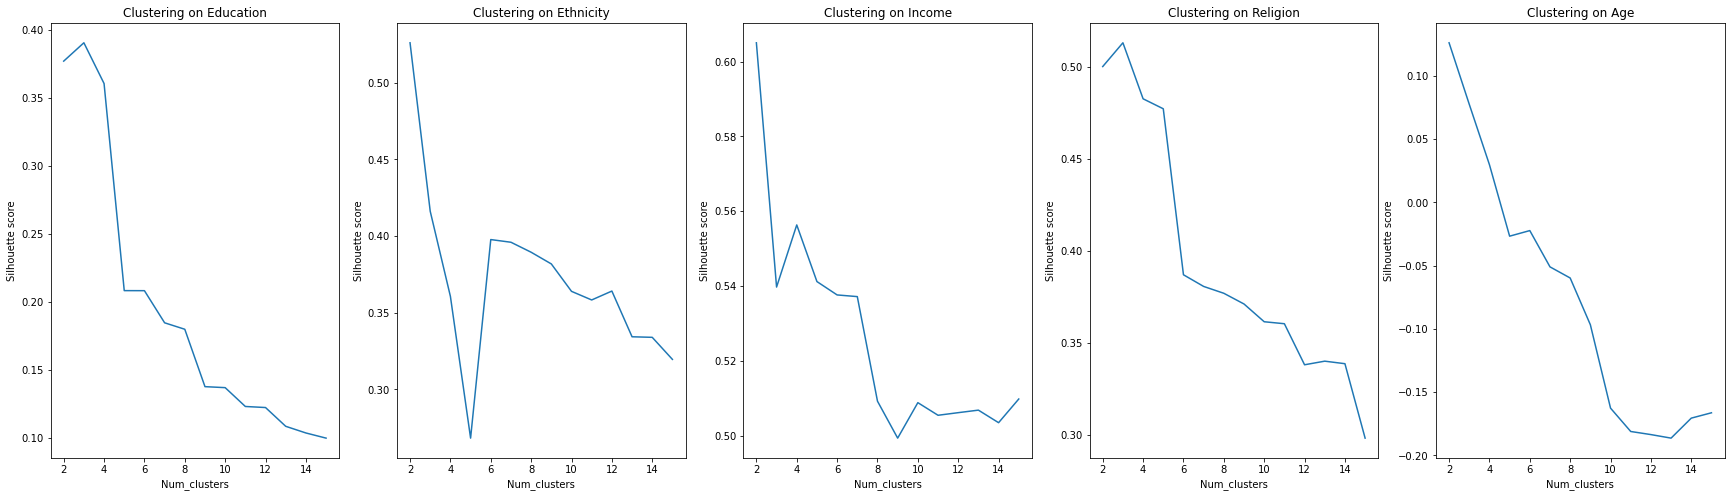

In [428]:
eth_complete = ["perc_ethnicity_white_2011","perc_ethnicity_mixed_2011","perc_ethnicity_asian_2011","perc_ethnicity_black_2011","perc_ethnicity_other_2011"]

msoa_cluster_eth = msoa_social[eth_complete]
msoa_cluster_edu = msoa_social[education]
msoa_cluster_inc = msoa_social["annual_median_income_2011"].values.reshape(-1,1)
msoa_cluster_rel = msoa_social[religions]
msoa_cluster_age = msoa_social[age]

silhouettes_edu = []
silhouettes_eth = []
silhouettes_inc = []
silhouettes_rel = []
silhouettes_age = []


for k in range(2, 16):
    # Cluster the data and assigne the labels
    
    labels_edu = AgglomerativeClustering(n_clusters=k, affinity = "cosine", linkage = "average").fit_predict(msoa_cluster_edu)
    labels_eth = AgglomerativeClustering(n_clusters=k, affinity = "cosine", linkage = "average").fit_predict(msoa_cluster_eth)
    labels_inc = AgglomerativeClustering(n_clusters=k).fit_predict(msoa_cluster_inc)
    labels_rel = AgglomerativeClustering(n_clusters=k, affinity = "cosine", linkage = "average").fit_predict(msoa_cluster_rel)
    labels_age = AgglomerativeClustering(n_clusters=k, affinity = "cosine", linkage = "average").fit_predict(msoa_cluster_age)
    
    # Get the Silhouette score
    score_edu = silhouette_score(msoa_cluster_edu, labels_edu)
    score_eth = silhouette_score(msoa_cluster_eth, labels_eth)
    score_inc = silhouette_score(msoa_cluster_inc, labels_inc)
    score_rel = silhouette_score(msoa_cluster_rel, labels_rel)
    score_age = silhouette_score(msoa_cluster_age, labels_age)
    
    silhouettes_edu.append({"k": k, "score": score_edu})
    silhouettes_eth.append({"k": k, "score": score_eth})
    silhouettes_inc.append({"k": k, "score": score_inc})
    silhouettes_rel.append({"k": k, "score": score_rel})
    silhouettes_age.append({"k": k, "score": score_age})

# Convert to dataframe
silhouettes_edu = pd.DataFrame(silhouettes_edu)
silhouettes_inc = pd.DataFrame(silhouettes_inc)
silhouettes_eth = pd.DataFrame(silhouettes_eth)
silhouettes_rel = pd.DataFrame(silhouettes_rel)
silhouettes_age = pd.DataFrame(silhouettes_age)

# Plot the data

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (30,8))
ax1.plot(silhouettes_edu.k, silhouettes_edu.score)
ax2.plot(silhouettes_eth.k, silhouettes_eth.score)
ax3.plot(silhouettes_inc.k, silhouettes_inc.score)
ax4.plot(silhouettes_rel.k, silhouettes_rel.score)
ax5.plot(silhouettes_age.k, silhouettes_age.score)

ax1.set_xlabel("Num_clusters")
ax1.set_ylabel("Silhouette score")
ax1.set_title("Clustering on Education")

ax2.set_xlabel("Num_clusters")
ax2.set_ylabel("Silhouette score")
ax2.set_title("Clustering on Ethnicity")

ax3.set_xlabel("Num_clusters")
ax3.set_ylabel("Silhouette score")
ax3.set_title("Clustering on Income")

ax4.set_xlabel("Num_clusters")
ax4.set_ylabel("Silhouette score")
ax4.set_title("Clustering on Religion")

ax5.set_xlabel("Num_clusters")
ax5.set_ylabel("Silhouette score")
ax5.set_title("Clustering on Age")


plt.show()

In [418]:
agg_clustering = AgglomerativeClustering(n_clusters = 6, affinity = "cosine", linkage = "average").fit(msoa_social[eth_complete])
msoa_social["Cluster_ethn"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = "cosine", linkage = "average").fit(msoa_social[education])
msoa_social["Cluster_edu"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 4).fit(msoa_social["annual_median_income_2011"].values.reshape(-1,1))
msoa_social["Cluster_inc"] = agg_clustering.labels_

agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = "cosine", linkage = "average").fit(msoa_social[religions])
msoa_social["Cluster_rel"] = agg_clustering.labels_

### Giving the Child a Name

For the education clustering, we can observe for the 3 Cluster that:

- Cluster 0 represent the highly educated middle and upper class, located in and around the Metropolitan Center of London and the Gentrified Areas in western London
- Cluster 1 represent students living in and around the different Campi inside and around London
- Cluster 2 represent the rest of the population in regard to lower to middle class inhabitants with a wider distribution of qualifications per-area

We rename these groupings those into Educated, Students and DAWSD

In [24]:
msoa_social[education + ["Cluster_edu"]].groupby(by = "Cluster_edu").median()

qualification_no_qualification_2011  qualification_level_1_2011  \
Cluster_edu                                                                    
0                                            811                         492   
1                                           1028                         638   
2                                           1355                         840   

             qualification_level_2_2011  qualification_apprenticeship_2011  \
Cluster_edu                                                                  
0                                   614                                 70   
1                                   625                                 67   
2                                   889                                119   

             qualification_level_3_2011  qualification_level_4_2011  \
Cluster_edu                                                           
0                                   662                        3333   
1                                  1590                        2248   
2                                   679                        1832   

             qualification_other_qualifications_2011  \
Cluster_edu                                            
0                                                601   
1                                                698   
2                                                629   

             qualification_students_2011  
Cluster_edu                               
0                                    477  
1                                   2479  
2                                    456

In [25]:
new_names_edu = {0:"Academic Degree", 1:"Students", 2:"Secondary School"}

msoa_social["Education"] = msoa_social["Cluster_edu"].apply(lambda x: new_names_edu[x])
msoa_social["Education"] = pd.Categorical(msoa_social["Education"], categories=["Academic Degree", "Students", "Secondary School"])

For the ethnicity clustering, we can observe for the 6 Cluster that:

- Cluster 0 represents areas with a small white majority and a strong asian minority
- Cluster 1 represents areas with a asian majority
- Cluster 2 represents areas with a black majority and also a significant white minority
- Cluster 3 represents areas with an equal represenatation of the three largests groups, white, asian and black. 
- Cluster 4 represents areas with a small white majority and a strong black minority
- Cluster 5 represents areas with a strong white majoirty

We rename these groupings those into Educated, Students and DAWSD

In [26]:
msoa_social[eth_complete + ["Cluster_ethn"]].groupby(by = "Cluster_ethn").median()

perc_ethnicity_white_2011  perc_ethnicity_mixed_2011  \
Cluster_ethn                                                         
0                                  51.6                        4.7   
1                                  27.8                        3.6   
2                                  37.1                        7.0   
3                                  31.9                        5.8   
4                                  51.8                        6.9   
5                                  75.4                        4.5   

              perc_ethnicity_asian_2011  perc_ethnicity_black_2011  \
Cluster_ethn                                                         
0                                 29.00                       9.80   
1                                 53.40                       9.85   
2                                 10.20                      41.30   
3                                 32.75                      24.85   
4                                 10.50                      24.90   
5                                  9.70                       5.70   

              perc_ethnicity_other_2011  
Cluster_ethn                             
0                                  3.30  
1                                  3.55  
2                                  4.10  
3                                  3.50  
4                                  3.20  
5                                  2.00

In [27]:
new_names_ethn = {0:"Strong Asian Minority", 1:"Asian Majority", 2:"Black Majority", 3:"Ethically Diverse", 4: "Strong Black Minority", 5: "White Majority"}

msoa_social["Ethnicity"] = msoa_social["Cluster_ethn"].apply(lambda x: new_names_ethn[x])
msoa_social["Ethnicity"] = pd.Categorical(msoa_social["Ethnicity"], categories=["Strong Asian Minority", "Asian Majority", "Black Majority", "Ethically Diverse", "Strong Black Minority", "White Majority"])

For the education clustering, we can observe for the 3 Cluster that:

- Cluster 0 represents area with a strong christian presents and also a high number of people without a declared religion. 
- Cluster 1 represents areas with a strong hindu presents
- Cluster 2 represents areas with a strong muslim presents, combined with information about ethnicity, we can see that these areas are likely high in population from Pakistan and Bagladesh. 

We rename these groupings those into Educated, Students and DAWSD

In [28]:
msoa_social[religions + ["Cluster_rel"]].groupby(by = "Cluster_rel").median()

perc_religion_christian_2011  perc_religion_buddhist_2011  \
Cluster_rel                                                              
0                                    51.9                          0.9   
1                                    28.8                          1.3   
2                                    25.2                          0.7   

             perc_religion_hindu_2011  perc_religion_jewish_2011  \
Cluster_rel                                                        
0                                 2.2                        0.4   
1                                40.2                        0.5   
2                                11.3                        0.2   

             perc_religion_muslim_2011  perc_religion_sikh_2011  \
Cluster_rel                                                       
0                                  8.4                      0.4   
1                                 13.1                      0.6   
2                                 36.6                      4.4   

             perc_religion_other_religion_2011  perc_religion_no_religion_2011  
Cluster_rel                                                                     
0                                          0.5                            22.3  
1                                          2.2                             4.5  
2                                          0.4                             6.9

In [29]:
new_names_rel = {0:"Christian Majority", 1:"Hindu Majority", 2:"Muslim Majority"}
msoa_social["Religion"] = msoa_social["Cluster_rel"].apply(lambda x: new_names_rel[x])
msoa_social["Religion"] = pd.Categorical(msoa_social["Religion"], categories=["Christian Majority", "Hindu Majority", "Muslim Majority"])

For the education clustering, we can observe for the 4 Cluster that:

- Cluster 0 represents the areas with the lowest median income.
- Cluster 1 represents the areas with the highest median income.
- Cluster 2 represents the areas with a low to medium median income.
- Cluster 2 represents the areas with a medium to high median income.

We rename these groupings those into Educated, Students and DAWSD

In [30]:
msoa_social[["annual_median_income_2011"] + ["Cluster_inc"]].groupby(by = "Cluster_inc").median()

annual_median_income_2011
Cluster_inc                           
0                              27814.0
1                              60656.0
2                              39300.5
3                              48827.5

In [31]:
new_names_inc = {0:"Working Class", 1:"Upper Class", 2:"Lower Middle Class", 3:"Upper Middle Class"}
msoa_social["Income"] = msoa_social["Cluster_inc"].apply(lambda x: new_names_inc[x])
msoa_social["Income"] = pd.Categorical(msoa_social["Income"], categories=["Working Class", "Upper Class", "Lower Middle Class", "Upper Middle Class"])

#### Visualizing the Data based on the Clustering
We can already make a few interesting observations in regard to the interplay of median income and other socio-economic factors.

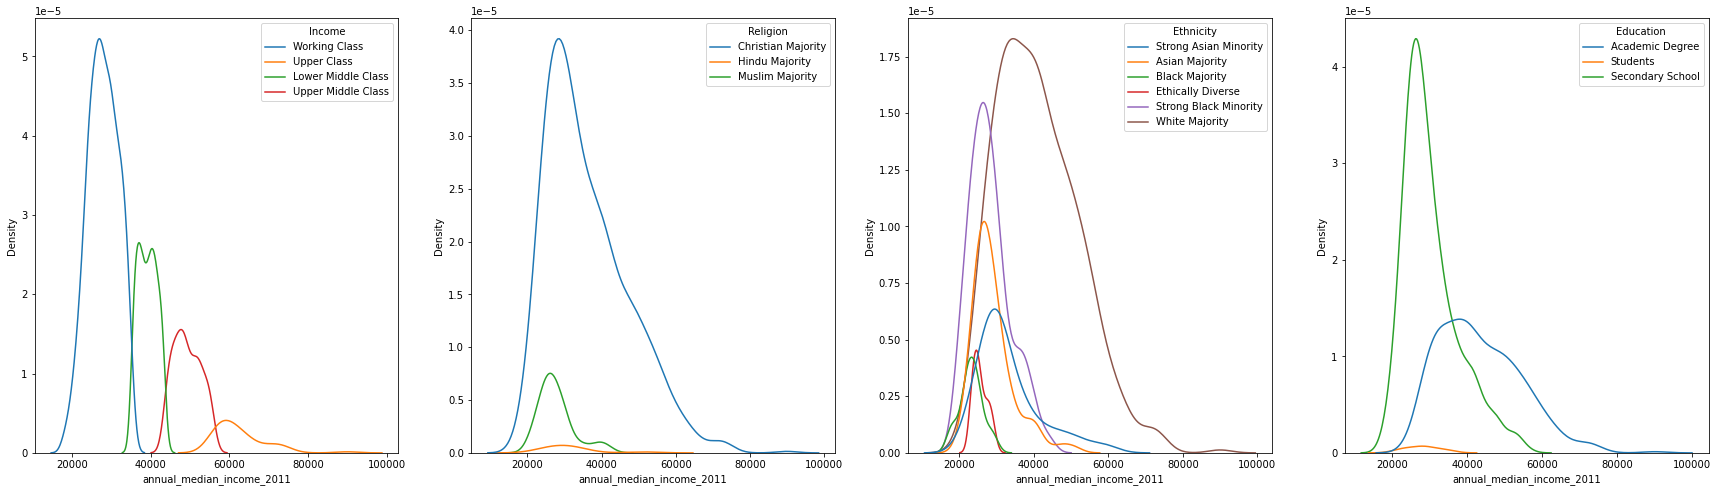

In [32]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (30,8))

sns.kdeplot(data = msoa_social, x = "annual_median_income_2011", hue = "Income", ax = ax1)
sns.kdeplot(data = msoa_social, x = "annual_median_income_2011", hue = "Religion", ax = ax2)
sns.kdeplot(data = msoa_social, x = "annual_median_income_2011", hue = "Ethnicity", ax = ax3)
sns.kdeplot(data = msoa_social, x = "annual_median_income_2011", hue = "Education", ax = ax4)

#### Adding Reverse Dicts, if we need to go back from one representation to the other, but keep consistency

In [33]:
reverse_dict_Ethnicity = {"Strong Black Minority":0, "Asian Majority":1, "Black Majority":2, "Ethically Diverse":3, "Strong Asian Minority":4, "White Majority":5}
reverse_dict_Income = {"Working Class":0, "Upper Class":1, "Lower Middle Class":2, "Upper Middle Class":3}
reverse_dict_Education = {"Academic Degree":0, "Students":1, "Secondary School":2}
reverse_dict_Religion = {"Christian Majority":0, "Hindu Majority":1, "Muslim Majority":2}

#### Testing some Plotting Approaches

In [34]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]], vertical_spacing=0.15)
fig.add_trace(go.Pie(labels=msoa_social.groupby(by= "Income").count().index, values=msoa_social.groupby(by= "Income").count()["name"], hole=.3 ,textinfo='label+percent'),1,1)
fig.add_trace(go.Pie(labels=msoa_social.groupby(by= "Ethnicity").count().index, values=msoa_social.groupby(by= "Ethnicity").count()["name"], hole=.3 ,textinfo='label+percent'),1,2)
fig.add_trace(go.Pie(labels=msoa_social.groupby(by= "Religion").count().index, values=msoa_social.groupby(by= "Religion").count()["name"], hole=.3,textinfo='label+percent'),2,1)
fig.add_trace(go.Pie(labels=msoa_social.groupby(by= "Education").count().index, values=msoa_social.groupby(by= "Education").count()["name"], hole=.3 ,textinfo='label+percent'),2,2)

fig.update_layout(showlegend = False)

print("Writing HTML to Repo...")
path = "../fierceeagle.github.io/_includes/"+"Donuts_Clusters"+".html"
fig.write_html("../fierceeagle.github.io/_includes/"+"Donuts_Clusters"+".html")
plot_map_inline(path)

Writing HTML to Repo...


In [35]:
msoa_social_sunburst = msoa_social.copy()
msoa_social_sunburst["total"] = "Total"
msoa_social_sunburst = msoa_social_sunburst.groupby(by = ["total","Ethnicity", "Education", "Income"]).count().reset_index()
msoa_social_sunburst = msoa_social_sunburst.dropna()
fig = px.sunburst(msoa_social_sunburst, path=["total","Ethnicity", "Education", "Income"], color = "name",branchvalues  = "total", values='name',color_continuous_scale='RdBu') 
fig.update_traces(insidetextorientation='radial')

path = "../fierceeagle.github.io/_includes/"+"Sunburst_"+".html"
print("Writing HTML to Repo...")
fig.write_html(path)
plot_map_inline(path)

Writing HTML to Repo...


#### Joining the Dataframes

In [36]:
lsoa_unfiltered_year = lsoa_social.join(lsoa_year, how = "inner")
msoa_unfiltered_year = msoa_social.join(msoa_year, how = "inner")
osward_unfiltered_year = osward_social.join(osward_year, how = "inner")

In [37]:
print("Turning the Data into a pickle ... ")

jar = "pickle_jar" 

msoa_unfiltered_year.to_pickle(path = os.path.join(jar,"msoa_unfiltered_year.pkl"))
lsoa_unfiltered_year.to_pickle(path = os.path.join(jar,"lsoa_unfiltered_year.pkl"))
osward_unfiltered_year.to_pickle(path = os.path.join(jar,"ward_unfiltered_year.pkl"))

print("Funniest shit I have ever seen!")

Turning the Data into a pickle ... 
Funniest shit I have ever seen!


#### Filtering Data based on Representativness for all later analysis

In [38]:
# Consider only Areas with atleast 10% Representative-ness:

lsoa_combined_year     = lsoa_unfiltered_year[lsoa_unfiltered_year.representativeness_norm > 0.10]
msoa_combined_year     = msoa_unfiltered_year[msoa_unfiltered_year.representativeness_norm > 0.10]
osward_combined_year    = osward_unfiltered_year[osward_unfiltered_year.representativeness_norm > 0.10]

#### Writing Filtered Data into pkl

In [39]:
msoa_combined_year.to_pickle(path = os.path.join(jar,"msoa_filtered_year.pkl"))
lsoa_combined_year.to_pickle(path = os.path.join(jar,"lsoa_filtered_year.pkl"))
osward_combined_year.to_pickle(path = os.path.join(jar,"ward_filtered_year.pkl"))


#### Taking them out of the Jar again

In [40]:
print("Loading pickled Data")
jar = "pickle_jar" 

osward_combined_year = pd.read_pickle(os.path.join(jar,"ward_filtered_year.pkl"))
msoa_combined_year = pd.read_pickle(os.path.join(jar,"msoa_filtered_year.pkl"))
lsoa_combined_year = pd.read_pickle(os.path.join(jar,"lsoa_filtered_year.pkl"))

msoa_unfiltered_year = pd.read_pickle(os.path.join(jar,"msoa_unfiltered_year.pkl"))
lsoa_unfiltered_year = pd.read_pickle(os.path.join(jar,"lsoa_unfiltered_year.pkl"))
osward_unfiltered_year = pd.read_pickle(os.path.join(jar,"ward_unfiltered_year.pkl"))

Loading pickled Data


#### Adding the Clustered Data to the GeoJson

In [41]:
for x in msoa_dict["features"]:
    x["properties"]["Income"] = msoa_unfiltered_year["Income"].loc[x["id"]]
    x["properties"]["Education"] = msoa_unfiltered_year["Education"].loc[x["id"]]
    x["properties"]["Ethnicity"] = msoa_unfiltered_year["Ethnicity"].loc[x["id"]]
    x["properties"]["Religion"] = msoa_unfiltered_year["Religion"].loc[x["id"]]
    x["properties"]["Name"] = msoa_unfiltered_year["name"].loc[x["id"]].split("0")[0][:-1]
    x["properties"]["Representativness"] = msoa_unfiltered_year["representativeness_norm"].loc[x["id"]]

### Its about Thyme

For a short look into the data we will look into the caloric consumption based on different nutrients on the ward level during the twelve month measuring period

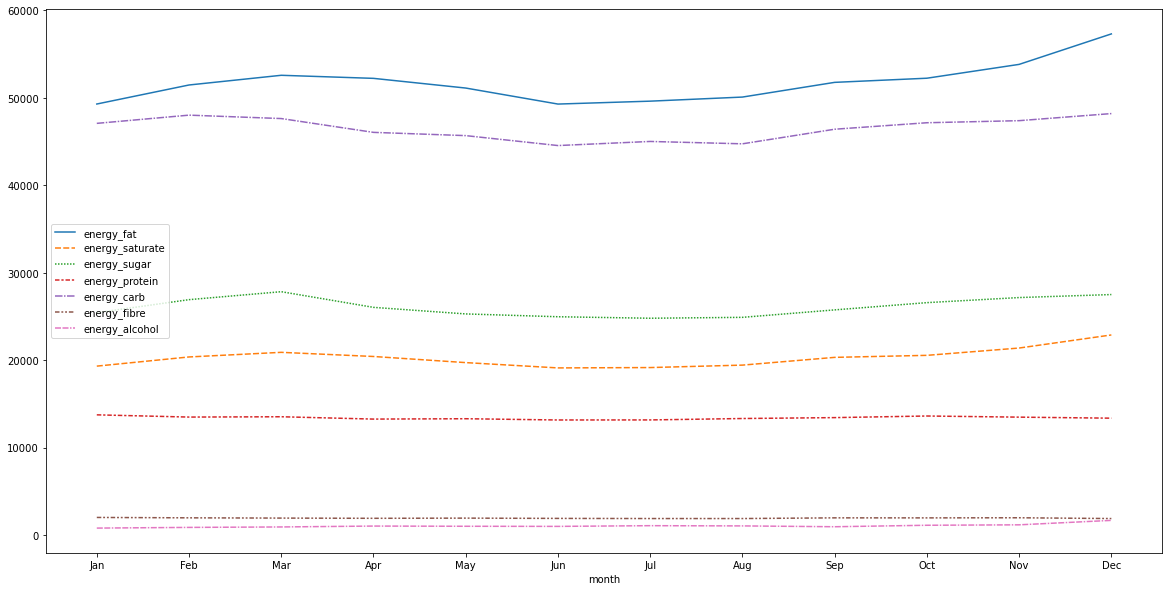

In [42]:
fig, ax = plt.subplots(figsize = (20,10))

g = sns.lineplot(data = osward_months.groupby(by = "month").sum()[nutrients], ax = ax)
plt.show()

#### Checking Data Quality

In [89]:
## Check if any value is Nan
print("There are currently %d rows with nan values in the LSOA dataframe " % lsoa_combined_year[lsoa_combined_year.isna().apply(lambda x : any(x), axis = 1)].shape[0])
print("There are currently %d rows with nan values in the MSOA dataframe " % msoa_combined_year[msoa_combined_year.isna().apply(lambda x : any(x), axis = 1)].shape[0])
print("There are currently %d rows with nan values in the Ward dataframe " % osward_combined_year[osward_combined_year.isna().apply(lambda x : any(x), axis = 1)].shape[0])

There are currently 0 rows with nan values in the LSOA dataframe 
There are currently 0 rows with nan values in the MSOA dataframe 
There are currently 0 rows with nan values in the Ward dataframe 


In [129]:
lof_clf = LocalOutlierFactor(n_jobs = -1)
msoa_combined_year["Outlier"] = lof_clf.fit_predict(msoa_combined_year[nutrients_hs]) == 1
msoa_combined_outlier_year = msoa_combined_year[msoa_combined_year.Outlier]

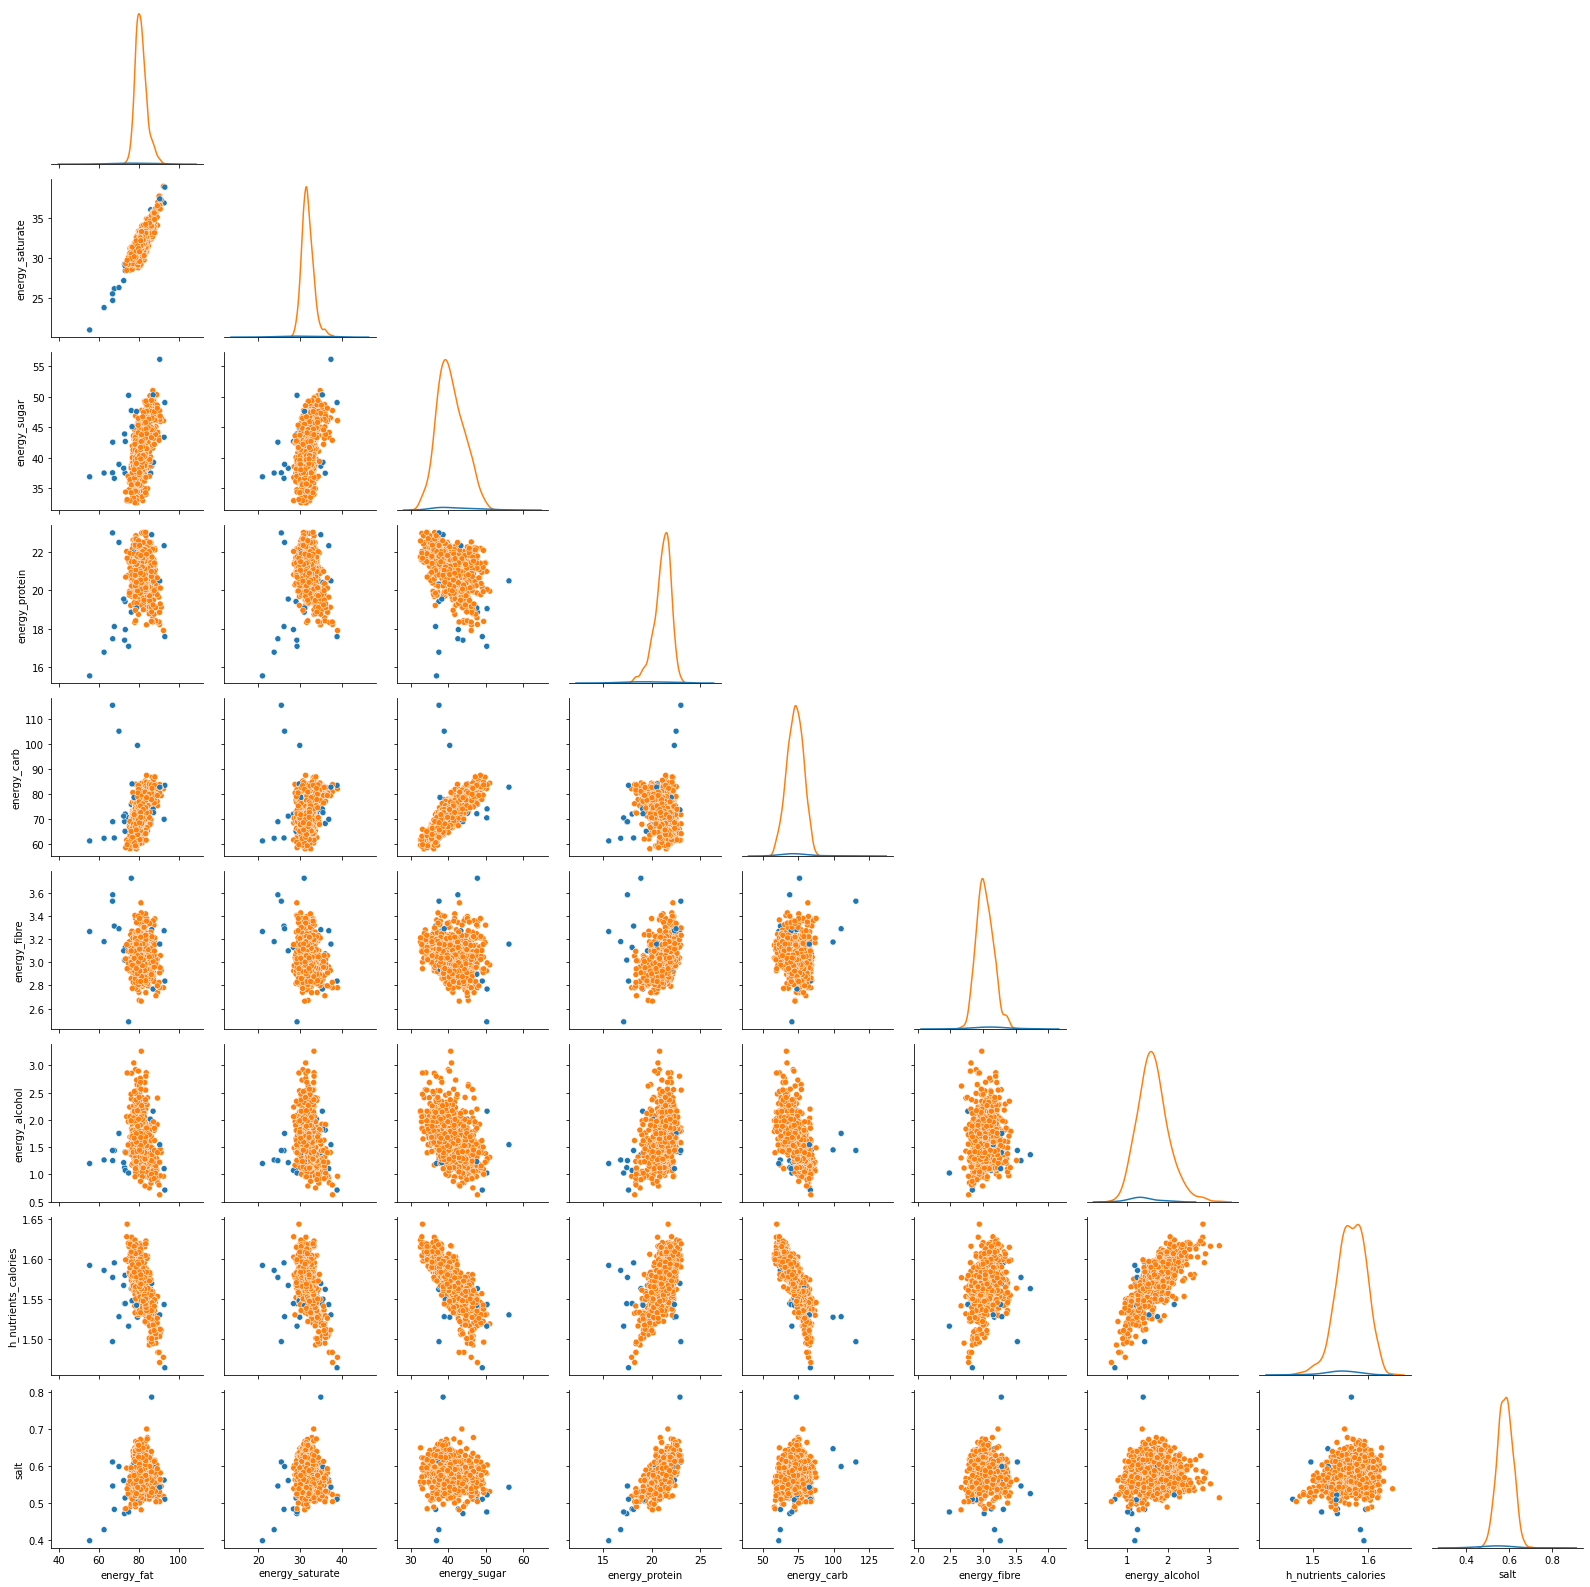

In [143]:
g = sns.PairGrid(msoa_combined_year[nutrients_hs + ["Outlier"]], diag_sharey=False, hue = "Outlier", corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

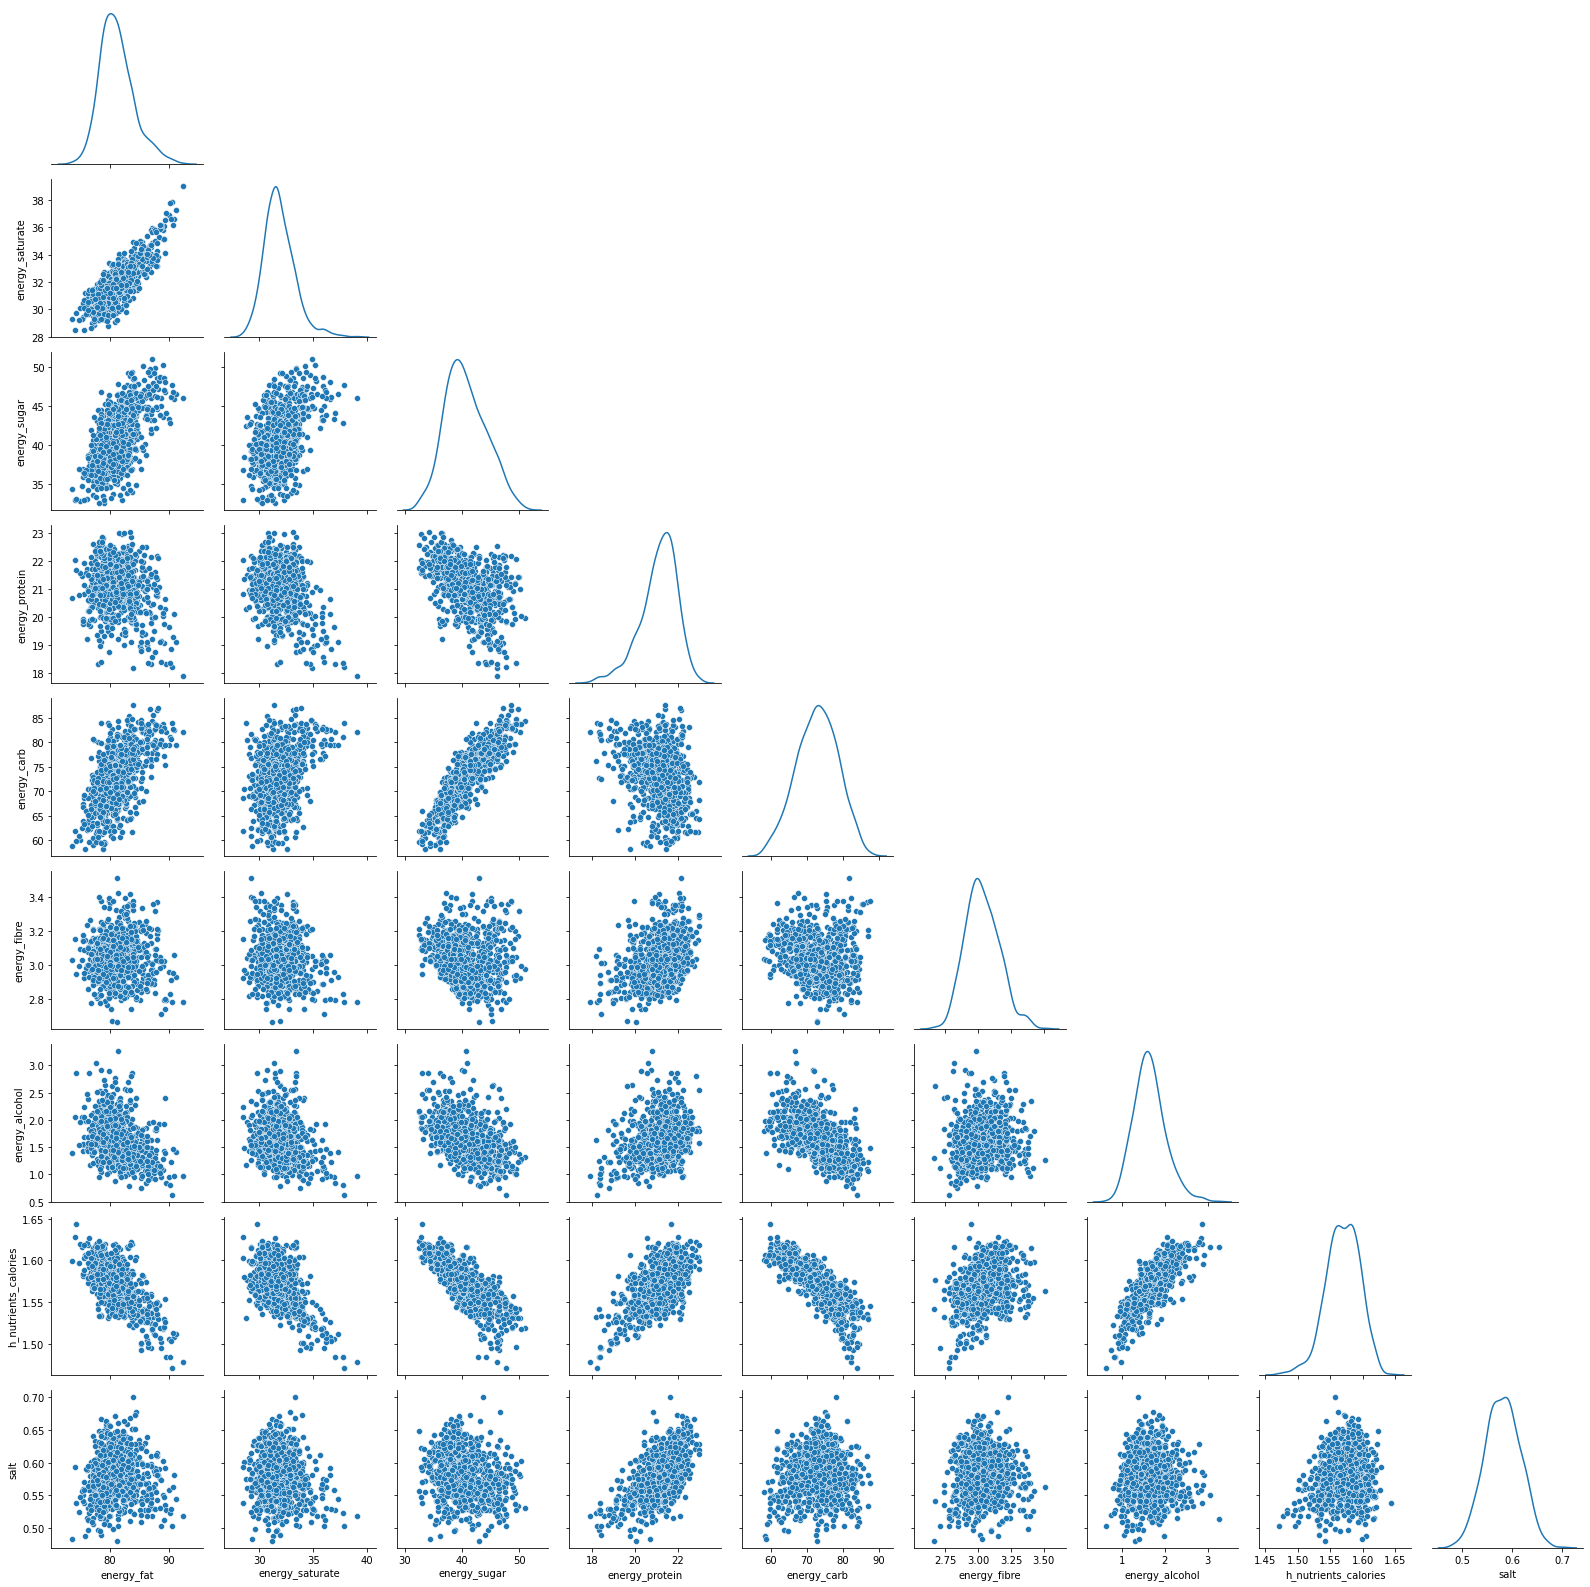

In [142]:
g = sns.PairGrid(msoa_combined_outlier_year[nutrients_hs], diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

#### Entering the 3D Mind Dojo

In [122]:
three_D_plot_factory(dataframe = msoa_combined_year,
                     x_axis ="annual_median_income_2011" ,
                     y_axis = "perc_ethnicity_white_2011",
                     title = "Interaction between Household Income, Ethnicity and Alcohol Consumption",
                     x_title = "White Inhabitants (%)",
                     y_title = "Area Median Income",
                     z_title = "Kcal by Alcohol in AAP",
                     aggfunc = np.mean, 
                     z_axis = "energy_alcohol",
                     html_name = "3D_Plot_White_Median_Income_Alcohol",
                     output_html = True,
                     auto_commit = True ,
                     quantiles = [0,.125,.25,.375,.5, .625,.75,.875,1]
                     )

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [99]:
three_D_multi_plot_factory(
                     dataframe = msoa_combined_year,
                     x_axis  ="annual_median_income_2011" ,
                     y_axis  = "perc_ethnicity_white_2011",
                     title   = "Interaction between Household Income, Ethnicity and Alcoholic Product Consumption",
                     x_title = "White Inhabitants (%)",
                     y_title = "Area Median Income",
                     z_title = "Kcal by Alcohol in AAP",
                     aggfunc = np.mean, 
                     category_z  = ["f_spirits", "f_wine", "f_beer"],
                     html_name   = "3D_Multi_Plot_Test",
                     output_html = True,
                     auto_commit = True,
                     quantiles   = [0,.125,.25,.375,.5, .625,.75,.875,1],
                     )

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


### GeoViz plots
Generation of the final GeoViz Plots, that can be found on the website, the initial data acqusition and merging is performed in independent Notebooks, also found in the repository, as they have package conflict and were only requiered to run once.  

<a id='GeoViz'></a>

#### Did you know that many of Londons Landmark, such as Big Ben, the Parliamnet and Buckinham Palace, are located inside the City of Westminster not the City of London?
Bonus Fact: Big Ben is the Clock inside the Elizabeth Tower of the Parliament not the Tower itself

In [132]:
geo_path = "Geo_Data"

scatter_top_four  = pd.read_csv("Geo_Data/top_four_store_locations_greater_london.csv")
scatter_top_four["size"] = 10
scatter_top_four["Store Name"] = scatter_top_four["BusinessName"]

fig = px.scatter_mapbox(scatter_top_four, lat="Latitude", lon="Longitude", hover_name="BusinessName", mapbox_style="carto-positron",
                        zoom = 10, center = {"lat": 51.509865, "lon": -0.118092},
                        opacity=0.65, 
                        size = "size",
                        color_discrete_map = {"Asda": "#78BE20" ,"Sainsbury" : "#ED8B01", "Morrisons":"#00563F", "Tesco":"#00539F"},
                        size_max = 7,
                        title = "Store Locations of the top four national brands in London",
                        color="Store Name",
                        hover_data={'Store Name':True, # remove species from hover data
                                    'size' : False,
                                    'Latitude':':.2f', # customize hover for column of y attribute
                                    'Longitude':':.2f', # add other column, customized formatting
                                   }
                       
                       )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))

path = "../fierceeagle.github.io/_includes/Store_Locations_London.html"

fig.write_html(path)
github_hook()
plot_map_inline(path)

Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


#### Exploring our Clustering

In [138]:
template = "%{properties.Name}<br>%{properties.Religion}<br>"

map_plot_factory(msoa_unfiltered_year,
                 geojson=msoa_dict,
                 color_col='Religion',
                 zoom=9,
                 opacity=0.35,
                 hovertemplate = template,
                  title = "Grouping of Religion on the MSOA Level",
                 labels={'Grouping of Religion on the MSOA Level'},
                 file_name = "Map_Factory_Religion")

Generating Map ... 
Updating Layout ... 
Writing HTML ...
Creating IFrame ...


In [141]:
template = "%{properties.Name}<br>%{properties.Ethnicity}<br>"


map_plot_factory(msoa_unfiltered_year,
                 geojson=msoa_dict,
                 color_col='Ethnicity',
                 zoom=9,
                 opacity=0.35,
                 hovertemplate = template,
                 title = "Grouping of Ethnicity on the MSOA Level", 
                 labels={'Grouping of Ethnicity on the MSOA Level'},
                 file_name = "Map_Factory_Ethnicity")

Generating Map ... 
Updating Layout ... 
Writing HTML ...
Creating IFrame ...


In [142]:
template = "%{properties.Name}<br>%{properties.Education}<br>"


map_plot_factory(msoa_unfiltered_year,
                 geojson=msoa_dict,
                 color_col='Education',
                 zoom=9,
                 opacity=0.35,
                 hovertemplate = template,
                 title = "Grouping of Education on the MSOA Level", 
                 labels={'Grouping of Education on the MSOA Level'},
                 file_name = "Map_Factory_Education")

Generating Map ... 
Updating Layout ... 
Writing HTML ...
Creating IFrame ...


In [136]:
template = "%{properties.Name}<br>Representativness: %{properties.Representativness:.3f}"

map_plot_factory(msoa_unfiltered_year,
                 geojson=msoa_dict,
                 color_col='representativeness_norm',
                 zoom=9,
                 opacity=0.35,
                 colorbar = dict(title = "Repr."), 
                 hovertemplate = template, 
                 title = "Reprensentativness on the MSOA Level",
                 labels={'Reprensentativness on the MSOA Level'},
                 file_name = "Map_Factory_Representativness")

Generating Map ... 
Updating Layout ... 
Writing HTML ...
Creating IFrame ...


In [137]:
template = "%{properties.Name}<br>%{properties.Income}<br>%{properties.Education}<br>%{properties.Ethnicity}<br>%{properties.Religion}<br>"

multilayer_map_plot_factory(msoa_unfiltered_year,
                            geojson=msoa_dict,
                            layers = ["Income","Education", "Ethnicity", "Religion"],
                            zoom=9,
                            opacity=0.65,
                            hovertemplate = template,
                            title = "Area Groupings of London Population",
                            hook = True,
                            file_name = "Multilayer_Population_Plot")

Generating Map ... 
Updating Layout ... 
Writing HTML ...
Call me Ishmael
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus
Creating IFrame ...


## Only Proper ML Following from here on out

#### Correlation Analysis
<a id='Stats'></a>

In [225]:
correl = [(group, stats.spearmanr(a = msoa_combined_year["representativeness_norm"], b = msoa_combined_year[group]).correlation) for group in (["annual_median_income_2011"] + ethnicities + education) if stats.spearmanr(a = msoa_combined_year["representativeness_norm"], b = msoa_combined_year[group]).pvalue < 0.05]

fig = go.Figure()
fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] >= 0], y=[c[1] for c in correl if c[1] >= 0],
                    marker_color= color_tesco_blue,
                    name='positives'))

fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] < 0], y=[c[1] for c in correl if c[1] < 0],
                    marker_color= color_tesco_red,
                    name='negatives'))

fig.update_layout(template = "plotly_white", showlegend=False)
path = "../fierceeagle.github.io/_includes/Correlation_Representativness_Norm_White.html"
fig.write_html("../fierceeagle.github.io/_includes/Correlation_Representativness_Norm_White.html")
plot_map_inline(path)

### Some Factorio

In [234]:
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ['perc_ethnicity_white_2011','perc_ethnicity_asian_2011','perc_ethnicity_black_2011'],
                 category_nutrion = nutrients_hs,
                 html_name = "Correlation_Nutirents_Different_Ethnicitites",
                 output_html = True,
                 auto_commit = True)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [236]:
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ["annual_median_income_2011", "qualification_level_2_2011", "qualification_level_4_2011"],
                 category_nutrion = nutrients_hs,
                 html_name = "Correlation_Nutirents_Income_Eductation_Ethnicitites",
                 output_html = True,
                 auto_commit = True)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


In [145]:
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ['perc_ethnicity_white_2011','perc_ethnicity_bame_2011'],
                 category_nutrion = nutrients,
                 html_name = "Correlation_Nutirents_WhiteAndBAME_Ethnicitites",
                 output_html = True,
                 auto_commit = True)

Writing HTML to Repo...
Ave Imperator, morituri te salutant
Hello, ... Hello, ... Vienna Calling?
Adding new Files ...
Commiting Changes ...
Pulling previous Changes ... 
Pushing to Remote...
Finished
Rock me Amadeus


#### Data Analysis Using Regressors 

Look at the interaction of Product and Nutrient Consumption and their Relationship and Predictive power towards factors, such as High Education, Diversity and Income 

We utilize the previously conducted outlier detection to improve the performance of the model and transform the data using the standard scaler. (Looking at the small multiples, we deem it as suffiecient evidence that the data approximates a normal distribution) 

In [147]:
msoa_regression = msoa_combined_outlier_year 
scaler = StandardScaler()
msoa_combined_outlier_year[nutrients_hs] = scaler.fit_transform(msoa_combined_outlier_year[nutrients_hs])

In [270]:
x_train, x_test, y_train, y_test = train_test_split(msoa_regression[nutrients_hs], msoa_regression["perc_ethnicity_bame_2011"], random_state = 0) 
ols_ethnicity = smf.ols(formula='perc_ethnicity_bame_2011 ~ energy_fat + energy_saturate + energy_sugar + energy_protein + energy_carb + energy_fibre + energy_alcohol + salt + h_nutrients_calories', data = x_train.join(y_train))
res = ols_ethnicity.fit()

# Print thes summary output provided by the library.
print(res.summary())
print("\n\nR2 Score Test:\n", r2_score(y_test, res.predict(x_test)))

                               OLS Regression Results                               
Dep. Variable:     perc_ethnicity_bame_2011   R-squared:                       0.698
Model:                                  OLS   Adj. R-squared:                  0.694
Method:                       Least Squares   F-statistic:                     163.7
Date:                      Sun, 06 Dec 2020   Prob (F-statistic):          3.90e-159
Time:                              14:53:13   Log-Likelihood:                -2429.2
No. Observations:                       646   AIC:                             4878.
Df Residuals:                           636   BIC:                             4923.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [271]:
x_train, x_test, y_train, y_test = train_test_split(msoa_regression[nutrients_hs], msoa_regression["annual_median_income_2011"], random_state = 0) 
ols_income = smf.ols(formula='annual_median_income_2011 ~ energy_fat + energy_saturate + energy_sugar + energy_protein + energy_carb + energy_fibre + energy_alcohol + salt + h_nutrients_calories', data = x_train.join(y_train))
res = ols_income.fit()

# Print thes summary output provided by the library.
print(res.summary())
print("\n\nR2 Score Test:\n", r2_score(y_test, res.predict(x_test)))

                                OLS Regression Results                               
Dep. Variable:     annual_median_income_2011   R-squared:                       0.624
Model:                                   OLS   Adj. R-squared:                  0.618
Method:                        Least Squares   F-statistic:                     117.1
Date:                       Sun, 06 Dec 2020   Prob (F-statistic):          1.02e-128
Time:                               14:53:14   Log-Likelihood:                -6596.9
No. Observations:                        646   AIC:                         1.321e+04
Df Residuals:                            636   BIC:                         1.326e+04
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

#### Ensemble Model Classfiers/Regressors 
<a id='Ensemble'></a>
We consider using Random Forest and Boosting Trees to predict the Labels we derived based on Clustering for Areas in the Greater London Area on the MSOA Level, as the data in these areas presents sufficient representativeness and number of distinct entires. We perform Model Selection for different Hyperparameters of the model using GridSearch and compare different score function to evaluate the model, especially also in regard to responsible data science and the role of label imbalance that can be observed.

#### Preprocessing 

As can be seen through the Donut Diagramms, we can observe that many labels occure only with low probability, thus we consider using Oversampling to increase the number of samples in each class.

#### Model Selection 

To address the issue of Imbalanced Labels and increase the Fairness of the Model in this problem we utilize the balanced_accuracy score to address the imbalanced class label during model selection and as main metric.

#### ML Helper Functions, performing Grid Search 

In [332]:
def post_pruning_decision_tree_selector(X_data, y_data, parameters, cv = 20, scoring = "accuracy", resampler = None):
    
    model = DecisionTreeClassifier()
    
    # Build a Pipeline to only resample the Train Folds
    if resampler == True: 
        model = make_pipeline(RandomOverSampler(), DecisionTreeClassifier())
        parameters = {'decisiontreeclassifier__' + key: parameters[key] for key in parameters}
        
    elif resampler is not None:
        model = make_pipeline(resampler, DecisionTreeClassifier())
        parameters = {'decisiontreeclassifier__' + key: parameters[key] for key in parameters}
        
    gsCV = GridSearchCV(model, parameters, cv = cv, scoring=scoring, n_jobs=-1)
    gsCV.fit(X_data,y_data)
    clf = gsCV.best_estimator_
    print ("Best GridSeach Score: ", gsCV.best_score_, "Best Parameter Combination: ", gsCV.best_params_)
    
    return clf, gsCV.best_score_, gsCV.best_params_


In [333]:
def random_forest_Classifier_GS(X_data, y_data, parameters, cv = 20, verbosity = 0, scoring = "accuracy", resampler = None):
    
    model = RandomForestClassifier()
    
    # Build a Pipeline to only resample the Train Folds
    if resampler == True: 
        model = make_pipeline(RandomOverSampler(), RandomForestClassifier())
        parameters = {'randomforestclassifier__' + key: parameters[key] for key in parameters}
        
    elif resampler is not None:
        model = make_pipeline(resampler, RandomForestClassifier())
        parameters = {'randomforestclassifier__' + key: parameters[key] for key in parameters}
    
    gsCV = GridSearchCV(model, parameters, cv = cv, n_jobs=-1, verbose = verbosity, scoring = scoring)
    gsCV.fit(X_data,y_data)
    clf = gsCV.best_estimator_
    print ("Best GridSeach Score: ", gsCV.best_score_, "Best Parameter Combination: ", gsCV.best_params_)
    
    return clf, gsCV.best_score_, gsCV.best_params_


In [334]:
def boosting_trees_Classifier_GS(X_data, y_data, parameters, cv = 20, verbosity = 0, scoring = "accuracy", resampler = None):

    model = GradientBoostingClassifier()
    
    # Build a Pipeline to only resample the Train Folds
    if resampler == True: 
        model = make_pipeline(RandomOverSampler(), GradientBoostingClassifier())
        parameters = {'gradientboostingclassifier__' + key: parameters[key] for key in parameters}
        
    elif resampler is not None:
        model = make_pipeline(resampler, GradientBoostingClassifier())
        parameters = {'gradientboostingclassifier__' + key: parameters[key] for key in parameters}
    
    gsCV = GridSearchCV(model,parameters, cv = cv, n_jobs=-1, verbose = verbosity, scoring = scoring)
    gsCV.fit(X_data,y_data)
    clf = gsCV.best_estimator_    
    
    print ("Best GridSeach Score: ", gsCV.best_score_, "Best Parameter Combination: ", gsCV.best_params_)
    
    return clf, gsCV.best_score_, gsCV.best_params_

In [331]:
def multilabel_prediction_report(y_true, x_test, predictor):
    print("Weighted F1 Score Result: %.3f " % f1_score(y_true, predictor.predict(x_test), average = "weighted") )
    print("Balanced Accuracy Result: %.3f " % balanced_accuracy_score(y_true, predictor.predict(x_test)))
    print("Accuracy: %.3f" % accuracy_score(y_true, predictor.predict(x_test)))
    print("Classification Report:")
    print(classification_report(y_true, predictor.predict(x_test)))

### Ethnicity

In [347]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Ethnicity"], random_state = 0) 
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, cv = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" : [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]})
multilabel_prediction_report(y_test, x_test, clf)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.1s finished


Best GridSeach Score:  0.5396393729727063 Best Parameter Combination:  {'class_weight': 'balanced', 'n_estimators': 150}
Weighted F1 Score Result: 0.705 
Balanced Accuracy Result: 0.595 
Accuracy: 0.727
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.77      0.93      0.84        29
       Black Majority       0.50      0.50      0.50         2
    Ethically Diverse       1.00      0.50      0.67         4
Strong Asian Minority       0.27      0.12      0.17        24
Strong Black Minority       0.70      0.65      0.67        54
       White Majority       0.77      0.86      0.81       103

             accuracy                           0.73       216
            macro avg       0.67      0.59      0.61       216
         weighted avg       0.70      0.73      0.71       216



In [348]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Ethnicity"], random_state = 0) 
clf, score, params = random_forest_Classifier_GS(x_train,y_train,verbosity = 5, cv = 12, scoring = "balanced_accuracy" , parameters = {"n_estimators" : [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]}, resampler = True)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 12 folds for each of 18 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   29.5s finished


Best GridSeach Score:  0.5654414515525626 Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__n_estimators': 100}
Weighted F1 Score Result: 0.714 
Balanced Accuracy Result: 0.603 
Accuracy: 0.718
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.76      0.90      0.83        29
       Black Majority       0.17      0.50      0.25         2
    Ethically Diverse       0.40      0.50      0.44         4
Strong Asian Minority       0.35      0.25      0.29        24
Strong Black Minority       0.70      0.65      0.67        54
       White Majority       0.82      0.83      0.82       103

             accuracy                           0.72       216
            macro avg       0.53      0.60      0.55       216
         weighted avg       0.72      0.72      0.71       216



In [376]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Ethnicity"], random_state = 0) 
clf, score, params = random_forest_Classifier_GS(x_train, y_train, cv = 15, verbosity = 5, scoring = "balanced_accuracy", parameters = {"n_estimators" : [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]}, resampler = SMOTE())
multilabel_prediction_report(y_test, x_test, clf)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   47.1s finished


Best GridSeach Score:  0.5930054513387847 Best Parameter Combination:  {'randomforestclassifier__class_weight': 'balanced_subsample', 'randomforestclassifier__n_estimators': 250}
Weighted F1 Score Result: 0.693 
Balanced Accuracy Result: 0.515 
Accuracy: 0.681
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.74      0.86      0.79        29
       Black Majority       0.00      0.00      0.00         2
    Ethically Diverse       0.40      0.50      0.44         4
Strong Asian Minority       0.35      0.38      0.36        24
Strong Black Minority       0.67      0.57      0.62        54
       White Majority       0.83      0.78      0.80       103

             accuracy                           0.68       216
            macro avg       0.50      0.51      0.50       216
         weighted avg       0.71      0.68      0.69       216



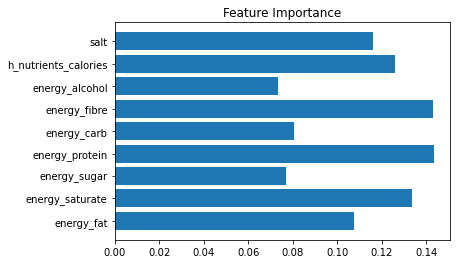

In [391]:
plt.barh(nutrients_hs, clf[1].feature_importances_)
plt.gca().set_title("Feature Importance")
plt.show()

### Education

In [350]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Education"], random_state = 0) 
clf, score, params = boosting_trees_Classifier_GS(x_train, y_train, verbosity = 5, cv = 5,  scoring = "balanced_accuracy" , parameters = {"max_depth" : [3,4,5,6], "n_estimators" : [100,150,200]}, resampler = SMOTE(n_jobs = -1, random_state = 0))
multilabel_prediction_report(y_test, x_test, clf)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:   11.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:   16.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.6s finished


Best GridSeach Score:  nan Best Parameter Combination:  {'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 100}
Weighted F1 Score Result: 0.869 
Balanced Accuracy Result: 0.579 
Accuracy: 0.870
Classification Report:
                  precision    recall  f1-score   support

 Academic Degree       0.82      0.84      0.83        82
Secondary School       0.90      0.89      0.90       133
        Students       0.00      0.00      0.00         1

        accuracy                           0.87       216
       macro avg       0.57      0.58      0.58       216
    weighted avg       0.87      0.87      0.87       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [357]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Education"], random_state = 0)
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" : [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]})
multilabel_prediction_report(y_test, x_test, clf)

Fitting 20 folds for each of 18 candidates, totalling 360 fits


C:\Users\49171\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 7 members, which is less than n_splits=20.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   18.7s


Best GridSeach Score:  0.7793251826146561 Best Parameter Combination:  {'class_weight': None, 'n_estimators': 50}
Weighted F1 Score Result: 0.877 
Balanced Accuracy Result: 0.582 
Accuracy: 0.880
Classification Report:
                  precision    recall  f1-score   support

 Academic Degree       0.85      0.83      0.84        82
Secondary School       0.90      0.92      0.91       133
        Students       0.00      0.00      0.00         1

        accuracy                           0.88       216
       macro avg       0.58      0.58      0.58       216
    weighted avg       0.88      0.88      0.88       216



[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   27.5s finished
C:\Users\49171\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [355]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Education"], random_state = 0)
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" : [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]}, resampler = True)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 20 folds for each of 18 candidates, totalling 360 fits


C:\Users\49171\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 7 members, which is less than n_splits=20.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   36.7s finished


Best GridSeach Score:  0.7757995415890152 Best Parameter Combination:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__n_estimators': 250}
Weighted F1 Score Result: 0.882 
Balanced Accuracy Result: 0.586 
Accuracy: 0.884
Classification Report:
                  precision    recall  f1-score   support

 Academic Degree       0.85      0.84      0.85        82
Secondary School       0.90      0.92      0.91       133
        Students       0.00      0.00      0.00         1

        accuracy                           0.88       216
       macro avg       0.59      0.59      0.59       216
    weighted avg       0.88      0.88      0.88       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [375]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Education"], random_state = 0)
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, cv = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" : [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]}, resampler = SMOTE(n_jobs = -1, random_state = 0))
multilabel_prediction_report(y_test, x_test, clf)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    4.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.0s finished


Best GridSeach Score:  nan Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__n_estimators': 50}
Weighted F1 Score Result: 0.873 
Balanced Accuracy Result: 0.580 
Accuracy: 0.875
Classification Report:
                  precision    recall  f1-score   support

 Academic Degree       0.84      0.83      0.83        82
Secondary School       0.90      0.91      0.90       133
        Students       0.00      0.00      0.00         1

        accuracy                           0.88       216
       macro avg       0.58      0.58      0.58       216
    weighted avg       0.87      0.88      0.87       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Religion

In [358]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Religion"], random_state = 0) 
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, cv = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" :  [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]})
multilabel_prediction_report(y_test, x_test, clf)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   11.5s finished


Best GridSeach Score:  0.5880431432973806 Best Parameter Combination:  {'class_weight': 'balanced', 'n_estimators': 200}
Weighted F1 Score Result: 0.926 
Balanced Accuracy Result: 0.535 
Accuracy: 0.940
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.96      0.99      0.97       193
    Hindu Majority       0.00      0.00      0.00         5
   Muslim Majority       0.73      0.61      0.67        18

          accuracy                           0.94       216
         macro avg       0.56      0.54      0.55       216
      weighted avg       0.91      0.94      0.93       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [359]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Religion"], random_state = 0) 
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, cv = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" :  [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]}, resampler = True)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.8s finished


Best GridSeach Score:  0.6757171014798133 Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__n_estimators': 100}
Weighted F1 Score Result: 0.917 
Balanced Accuracy Result: 0.530 
Accuracy: 0.926
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.96      0.98      0.97       193
    Hindu Majority       0.00      0.00      0.00         5
   Muslim Majority       0.61      0.61      0.61        18

          accuracy                           0.93       216
         macro avg       0.52      0.53      0.53       216
      weighted avg       0.91      0.93      0.92       216



In [360]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Religion"], random_state = 0) 
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, cv = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" :  [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]}, resampler = SMOTE(n_jobs = -1, random_state = 0))
multilabel_prediction_report(y_test, x_test, clf)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished


Best GridSeach Score:  nan Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__n_estimators': 50}
Weighted F1 Score Result: 0.902 
Balanced Accuracy Result: 0.555 
Accuracy: 0.903
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.97      0.94      0.96       193
    Hindu Majority       0.00      0.00      0.00         5
   Muslim Majority       0.48      0.72      0.58        18

          accuracy                           0.90       216
         macro avg       0.48      0.56      0.51       216
      weighted avg       0.91      0.90      0.90       216



### Income

In [353]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Income"], random_state = 0) 
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" : [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]})
multilabel_prediction_report(y_test, x_test, clf)

Fitting 20 folds for each of 18 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   38.4s finished


Best GridSeach Score:  0.5239129072681705 Best Parameter Combination:  {'class_weight': None, 'n_estimators': 150}
Weighted F1 Score Result: 0.690 
Balanced Accuracy Result: 0.475 
Accuracy: 0.699
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.43      0.41      0.42        37
       Upper Class       0.33      0.15      0.21        13
Upper Middle Class       0.40      0.45      0.42        31
     Working Class       0.86      0.89      0.87       135

          accuracy                           0.70       216
         macro avg       0.50      0.47      0.48       216
      weighted avg       0.69      0.70      0.69       216



In [361]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Income"], random_state = 0) 
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" : [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]}, resampler = True)
multilabel_prediction_report(y_test, x_test, clf)

Fitting 20 folds for each of 18 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.9s finished


Best GridSeach Score:  0.5433730158730159 Best Parameter Combination:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__n_estimators': 150}
Weighted F1 Score Result: 0.676 
Balanced Accuracy Result: 0.483 
Accuracy: 0.667
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.34      0.43      0.38        37
       Upper Class       0.50      0.31      0.38        13
Upper Middle Class       0.32      0.35      0.34        31
     Working Class       0.89      0.84      0.86       135

          accuracy                           0.67       216
         macro avg       0.51      0.48      0.49       216
      weighted avg       0.69      0.67      0.68       216



In [363]:
x_train, x_test, y_train, y_test = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year["Income"], random_state = 0) 
clf, score, params = random_forest_Classifier_GS(x_train, y_train, verbosity = 5, scoring = "balanced_accuracy" , parameters = {"n_estimators" : [50,75,100,150,200,250], "class_weight" : [None, "balanced", "balanced_subsample"]}, resampler = SMOTE(n_jobs = -1, random_state = 0))
multilabel_prediction_report(y_test, x_test, clf)

Fitting 20 folds for each of 18 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   47.7s finished


Best GridSeach Score:  0.5601566416040099 Best Parameter Combination:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__n_estimators': 100}
Weighted F1 Score Result: 0.695 
Balanced Accuracy Result: 0.549 
Accuracy: 0.685
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.41      0.46      0.44        37
       Upper Class       0.35      0.46      0.40        13
Upper Middle Class       0.42      0.45      0.44        31
     Working Class       0.89      0.82      0.85       135

          accuracy                           0.69       216
         macro avg       0.52      0.55      0.53       216
      weighted avg       0.71      0.69      0.70       216



#### "Explainable" Decision Tree Model 
<a id='>DecisionTree'></a>
Try to train a model that can provide good performance on a testing set and additonally an understandable decision tree, at least on a higher level understanding. 

#### Predicting Ethnicity based on Nutrient consumption

In [366]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year['Ethnicity'], random_state=0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x, train_y, cv = 12, scoring = "balanced_accuracy", parameters = {'ccp_alpha':np.arange(0, 0.01, 0.0005), "max_features": ["log2", "sqrt", None], "class_weight" : [None, "balanced"], "min_samples_split" :np.arange(4,20, 4)})

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, nutrients_hs, "Ethnicity", clf, reverse_dict_Ethnicity)

Best GridSeach Score:  0.5442884533162311 Best Parameter Combination:  {'ccp_alpha': 0.002, 'class_weight': 'balanced', 'max_features': 'log2', 'min_samples_split': 8}
Weighted F1 Score Result: 0.589 
Balanced Accuracy Result: 0.506 
Accuracy: 0.569
Classification Report:
                       precision    recall  f1-score   support

       Asian Majority       0.62      0.62      0.62        29
       Black Majority       0.09      0.50      0.15         2
    Ethically Diverse       0.20      0.50      0.29         4
Strong Asian Minority       0.21      0.33      0.26        24
Strong Black Minority       0.59      0.35      0.44        54
       White Majority       0.78      0.73      0.75       103

             accuracy                           0.57       216
            macro avg       0.42      0.51      0.42       216
         weighted avg       0.63      0.57      0.59       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning:

Pass classes=[0 1 2 3 4 5], y=[1, 5, 1, 5, 5, ..., 4, 4, 3, 0, 1]
Length: 646
Categories (6, int64): [4, 1, 2, 3, 0, 5] as keyword args. From version 0.25 passing these as positional arguments will result in an error



Best GridSeach Score:  0.5685745614035087 Best Parameter Combination:  {'ccp_alpha': 0.005, 'class_weight': 'balanced', 'max_features': 'log2', 'min_samples_split': 16}
Weighted F1 Score Result: 0.618 
Balanced Accuracy Result: 0.385 
Accuracy: 0.588
Classification Report:
                    precision    recall  f1-score   support

Lower Middle Class       0.27      0.30      0.28        37
       Upper Class       0.12      0.23      0.16        13
Upper Middle Class       0.19      0.23      0.21        31
     Working Class       0.92      0.79      0.85       135

          accuracy                           0.59       216
         macro avg       0.38      0.38      0.38       216
      weighted avg       0.66      0.59      0.62       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning:

Pass classes=[0 1 2 3], y=[0, 2, 0, 3, 0, ..., 0, 0, 0, 2, 0]
Length: 646
Categories (4, int64): [0, 1, 2, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error



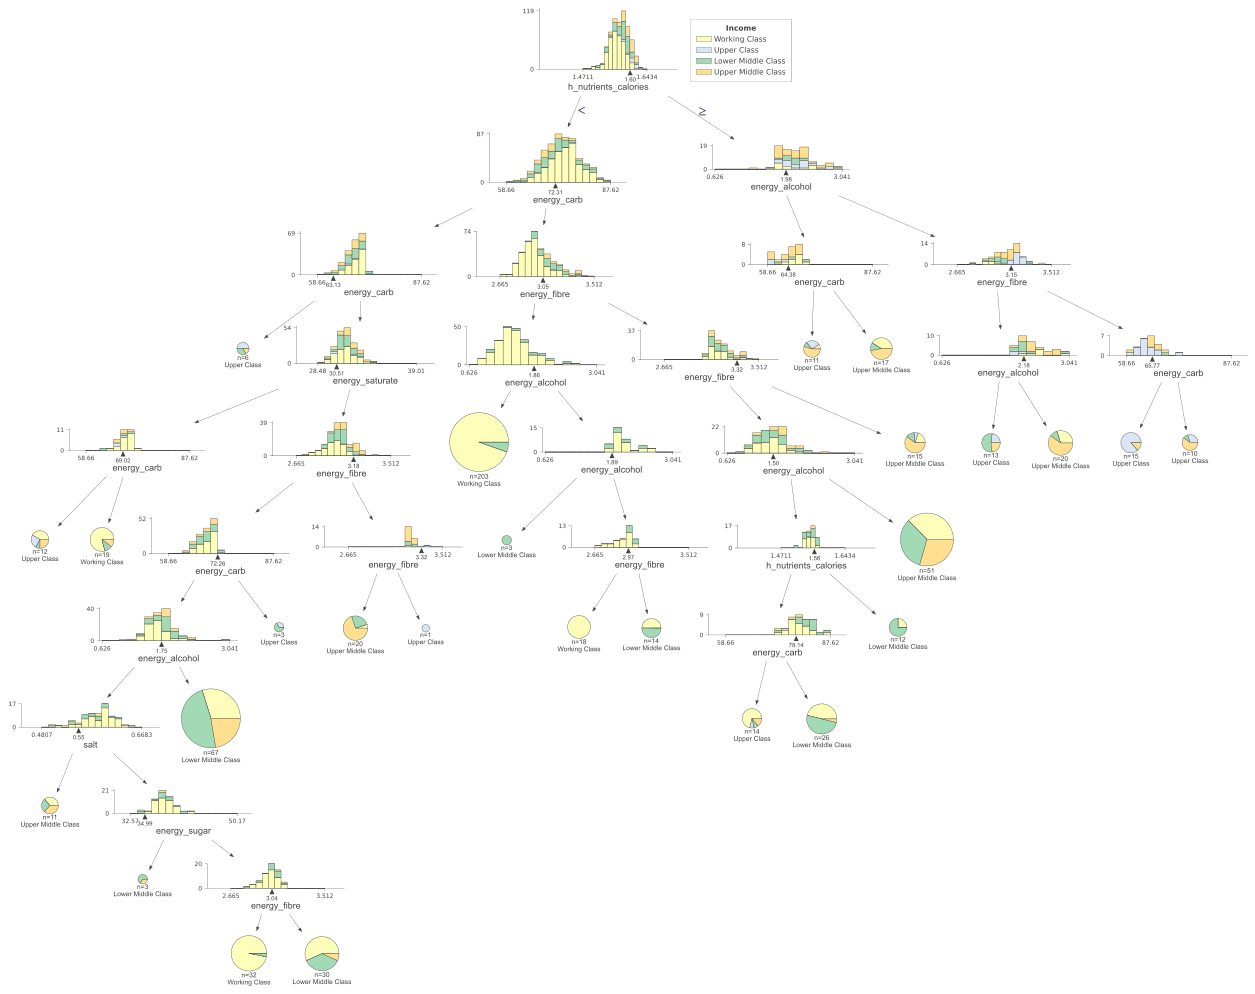

In [367]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year['Income'], random_state=0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x, train_y, cv = 20, scoring = "balanced_accuracy", parameters = {'ccp_alpha':np.arange(0, 0.01, 0.0005), "max_features": ["log2", "sqrt", None], "class_weight" : [None, "balanced"], "min_samples_split" :np.arange(4,20, 4)})

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, nutrients_hs, "Income", clf, reverse_dict_Income)

Best GridSeach Score:  0.7524723989130769 Best Parameter Combination:  {'ccp_alpha': 0.0095, 'class_weight': 'balanced', 'max_features': 'sqrt', 'min_samples_split': 8}
Weighted F1 Score Result: 0.834 
Balanced Accuracy Result: 0.679 
Accuracy: 0.796
Classification Report:
                    precision    recall  f1-score   support

Christian Majority       0.98      0.80      0.88       193
    Hindu Majority       0.40      0.40      0.40         5
   Muslim Majority       0.28      0.83      0.42        18

          accuracy                           0.80       216
         macro avg       0.55      0.68      0.57       216
      weighted avg       0.91      0.80      0.83       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning:

Pass classes=[0 1 2], y=[2, 0, 2, 0, 0, ..., 0, 0, 0, 0, 2]
Length: 646
Categories (3, int64): [0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error



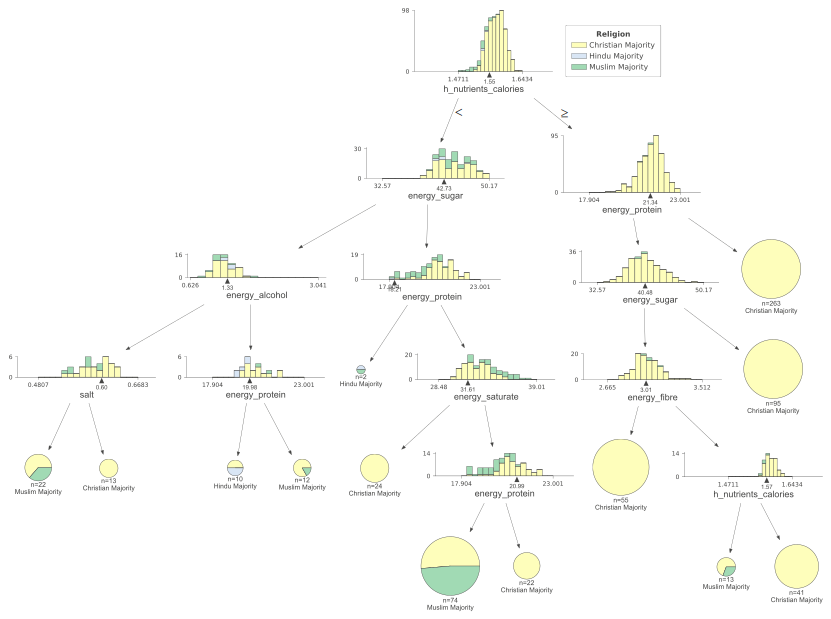

In [370]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year['Religion'], random_state=0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x, train_y, cv = 5, scoring = "balanced_accuracy", parameters = {'ccp_alpha':np.arange(0, 0.01, 0.0005), "max_features": ["log2", "sqrt", None], "class_weight" : [None, "balanced"], "min_samples_split" :np.arange(4,20, 4)})

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, nutrients_hs, "Religion", clf, reverse_dict_Religion)

#### Predicting Education based on Nutrient consumption

C:\Users\49171\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 7 members, which is less than n_splits=10.



Best GridSeach Score:  0.6927570427570428 Best Parameter Combination:  {'ccp_alpha': 0.005, 'class_weight': 'balanced', 'max_features': 'log2', 'min_samples_split': 18}
Weighted F1 Score Result: 0.886 
Balanced Accuracy Result: 0.587 
Accuracy: 0.880
Classification Report:
                  precision    recall  f1-score   support

 Academic Degree       0.86      0.87      0.86        82
Secondary School       0.92      0.89      0.91       133
        Students       0.00      0.00      0.00         1

        accuracy                           0.88       216
       macro avg       0.59      0.59      0.59       216
    weighted avg       0.89      0.88      0.89       216



C:\Users\49171\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning:

Pass classes=[0 1 2], y=[2, 0, 2, 0, 2, ..., 2, 2, 2, 2, 2]
Length: 646
Categories (3, int64): [0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error



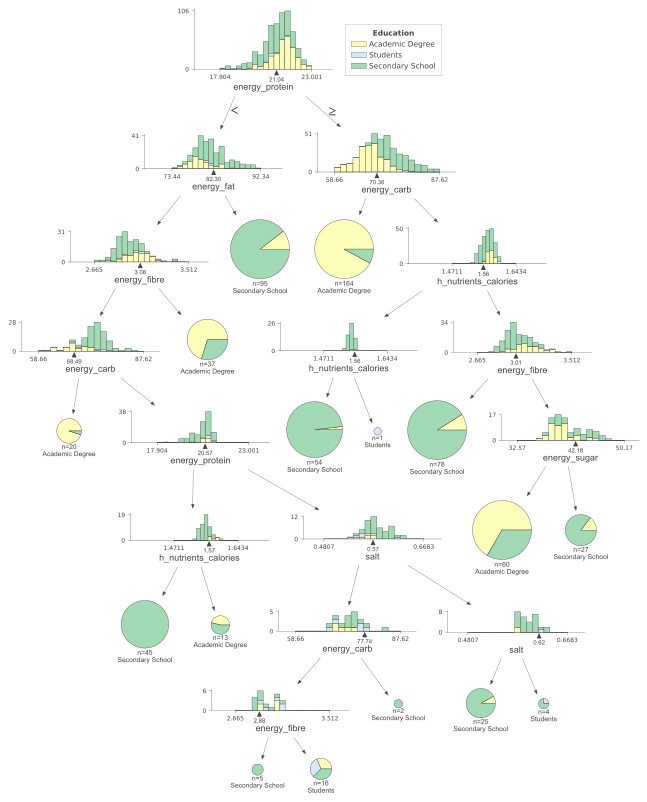

In [372]:
train_x, test_x, train_y, test_y = train_test_split(msoa_combined_outlier_year[nutrients_hs], msoa_combined_outlier_year['Education'], random_state=0) 

clf, score, alpha = post_pruning_decision_tree_selector(train_x, train_y, cv = 10, scoring = "balanced_accuracy",  parameters = {'ccp_alpha':np.arange(0.001, 0.01, 0.0005), "class_weight" : [None, "balanced"], "max_features": ["log2", "sqrt", None], "min_samples_split" :np.arange(2,20, 4)})

# Training on the Full Data and Validating it on the Test Set
clf = clf.fit(train_x, train_y)
multilabel_prediction_report(test_y, test_x, clf)

# A Visualization of the Decision Tree
tree_plot_factory(train_x, train_y, nutrients_hs, "Education", clf, reverse_dict_Education)

#### Learning Rules that allows us to explore Interrelations between interactions
<a id='AssociationRule'></a>

We use the discretization based on the clustering to analyse frequently found commonalities between nutrient consumption and socio-economic make-up of an area founding on frequent item set and association rule mining. 

In [160]:
msoa_combined_items = msoa_combined_year[products].copy()
msoa_combined_items.columns = [x.split("_")[1] for x in products]
cleaned_names = [x.split("_")[1] for x in products]
cleaned_names = [x + "_High" for x in cleaned_names] + [x + "_Low" for x in cleaned_names] + [x + "Low_to_Middle" for x in cleaned_names]+ [x + "Middle_to_High" for x in cleaned_names]
nutrient_sets = set(cleaned_names)

# You could do this probably somewhat smarter 
# Encoding Data into a "Set" Dataset

for col in msoa_combined_items.columns:
    lower  =  msoa_combined_items[col].quantile(0.25)
    middle =  msoa_combined_items[col].quantile(0.5)
    higher =  msoa_combined_items[col].quantile(0.75)
    msoa_combined_items[col + "_Low"] = msoa_combined_items[col].apply(lambda x : x < lower)
    msoa_combined_items[col + "_Low_to_Middle"] = msoa_combined_items[col].apply(lambda x : x >= lower and x < middle)
    msoa_combined_items[col + "_Middle_to_High"] = msoa_combined_items[col].apply(lambda x :  x < higher and x > middle)
    msoa_combined_items[col + "_High"] = msoa_combined_items[col].apply(lambda x : x > higher)
    msoa_combined_items = msoa_combined_items.drop(col, axis = 1)
    
msoa_combined_items = msoa_combined_items.join(pd.get_dummies(msoa_social[["Education","Ethnicity","Religion","Income"]]).applymap(lambda x: True if x == 1 else False))

In [161]:
print("Computing Frequent Itemset ...")
# Given the structure of the information, low support is indemic
frequent_itemsets = apriori(msoa_combined_items, min_support = 0.05, use_colnames = True)


# Use Association Rules as an "explainable" Model

print("Computing Association Rules ...")
rules_association = arule(frequent_itemsets, metric = 'lift', min_threshold = 1.5)
print("Cleaning Rule Set for desiered Rules ...")
rules = rules_association[rules_association.apply(lambda x : True if x["antecedents"].issubset(nutrient_sets) and not any([True if y in nutrient_sets else False for y in x["consequents"]])  else False, axis = 1)].sort_values(by = "confidence", ascending = False).sort_values(by = "lift", ascending = False)
rules.head(20)

Computing Frequent Itemset ...
Computing Association Rules ...
Cleaning Rule Set for desiered Rules ...


antecedents  \
260735  (sweets_High, poultry_Low, wine_Low, meat_Low)   
358628  (sweets_High, poultry_Low, wine_Low, meat_Low)   
139559               (sweets_High, wine_Low, meat_Low)   
49949                          (poultry_Low, wine_Low)   
259270               (wine_Low, meat_Low, grains_High)   
261303               (sweets_High, wine_Low, meat_Low)   
260854  (sweets_High, poultry_Low, wine_Low, meat_Low)   
48011                             (wine_Low, meat_Low)   
135760               (wine_Low, meat_Low, grains_High)   
48037                             (wine_Low, meat_Low)   
135818               (wine_Low, meat_Low, grains_High)   
139615               (sweets_High, wine_Low, meat_Low)   
138689  (sweets_High, poultry_Low, wine_Low, meat_Low)   
138902               (poultry_Low, wine_Low, meat_Low)   
141193            (sweets_High, poultry_Low, wine_Low)   
146261                         (sweets_High, wine_Low)   
261003               (poultry_Low, wine_Low, meat_Low)   
263637                         (sweets_High, wine_Low)   
261656            (sweets_High, poultry_Low, wine_Low)   
8938                           (poultry_Low, wine_Low)   

                                              consequents  antecedent support  \
260735  (Education_Secondary School, Ethnicity_Asian M...            0.074492   
358628  (Education_Secondary School, Income_Working Cl...            0.074492   
139559  (Education_Secondary School, Ethnicity_Asian M...            0.081264   
49949   (Education_Secondary School, Religion_Muslim M...            0.103837   
259270  (Education_Secondary School, Income_Working Cl...            0.077878   
261303  (Education_Secondary School, Income_Working Cl...            0.081264   
260854   (Income_Working Class, Ethnicity_Asian Majority)            0.074492   
48011   (Education_Secondary School, Religion_Muslim M...            0.106095   
135760  (Education_Secondary School, Ethnicity_Asian M...            0.077878   
48037   (Religion_Muslim Majority, Ethnicity_Asian Maj...            0.106095   
135818   (Income_Working Class, Ethnicity_Asian Majority)            0.077878   
139615   (Income_Working Class, Ethnicity_Asian Majority)            0.081264   
138689                         (Ethnicity_Asian Majority)            0.074492   
138902  (Education_Secondary School, Ethnicity_Asian M...            0.088036   
141193  (Education_Secondary School, Ethnicity_Asian M...            0.084650   
146261  (Education_Secondary School, Religion_Muslim M...            0.128668   
261003  (Education_Secondary School, Income_Working Cl...            0.088036   
263637  (Education_Secondary School, Religion_Muslim M...            0.128668   
261656  (Education_Secondary School, Income_Working Cl...            0.084650   
8938                           (Religion_Muslim Majority)            0.103837   

        consequent support   support  confidence      lift  leverage  \
260735            0.101580  0.056433    0.757576  7.457912  0.048866   
358628            0.094808  0.051919    0.696970  7.351371  0.044856   
139559            0.101580  0.058691    0.722222  7.109877  0.050436   
49949             0.068849  0.050790    0.489130  7.104419  0.043641   
259270            0.094808  0.051919    0.666667  7.031746  0.044535   
261303            0.094808  0.054176    0.666667  7.031746  0.046472   
260854            0.099323  0.051919    0.696970  7.017218  0.044520   
48011             0.068849  0.050790    0.478723  6.953261  0.043486   
135760            0.101580  0.054176    0.695652  6.848309  0.046265   
48037             0.071106  0.050790    0.478723  6.732523  0.043246   
135818            0.099323  0.051919    0.666667  6.712121  0.044184   
139615            0.099323  0.054176    0.666667  6.712121  0.046105   
138689            0.113995  0.056433    0.757576  6.645665  0.047942   
138902            0.101580  0.058691    0.666667  6.562963  0.049748   
141193            0.101580  0.056433    0.

In [162]:
rules = rules.head(20)
rules["antecedents"] = rules.apply(lambda x: ''.join([label_processor(x).capitalize() + "<br>" for x in list(x["antecedents"])]).replace("_high", u" \u21D7").replace("_low", u" \u21D8") , axis = 1)
rules["consequents"] = rules.apply(lambda x: ''.join([label_processor(x).capitalize() + "<br>" for x in list(x["consequents"])]).replace("_high", u" \u21D7").replace("_low", u" \u21D8").replace("_", " "), axis = 1)
rules[["support","confidence", "lift"]] = rules[["support","confidence", "lift"]].applymap(lambda x : round(x,3))
rules = rules[["antecedents", "consequents", "support","confidence", "lift"]]
fig = ff.create_table(rules, height_constant=60)

path = "../fierceeagle.github.io/_includes/AssociationRuleTable_Nutrients.html"
fig.write_html(path)
plot_map_inline(path)

# Merry Christmas

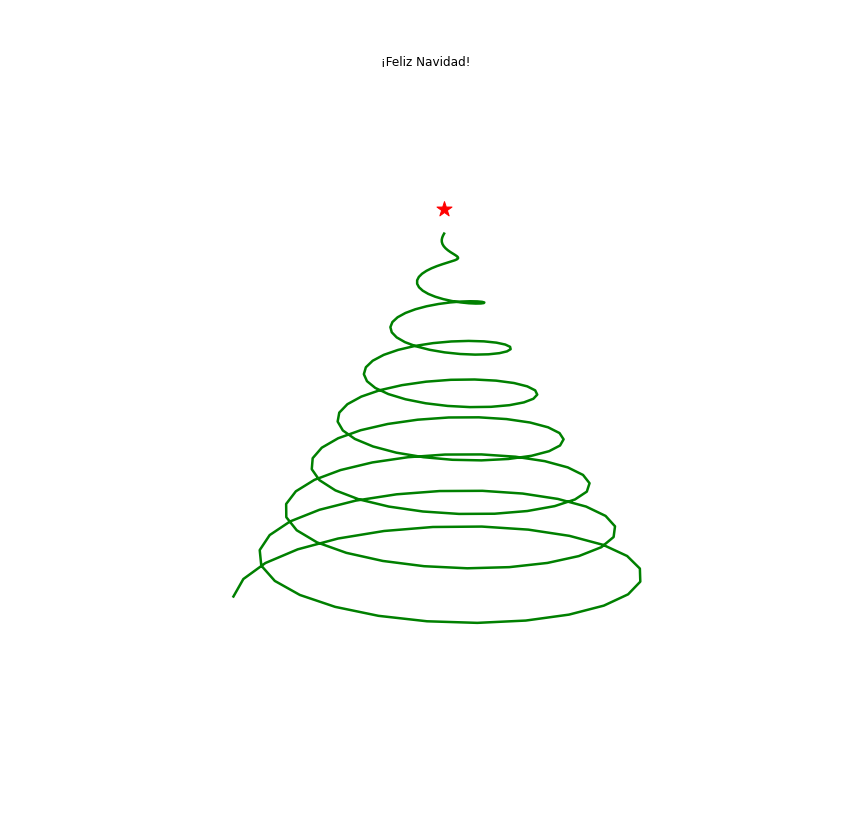

In [48]:
# Calculate spiral coordinates for the Xmas tree
theta = np.linspace(-8 * np.pi, 8 * np.pi, 200) 
z = np.linspace(-3, 0, 200)
r = 5
x = r * np.sin(theta)*z
y = r * np.cos(theta)*z
 
# Use matplotib and its OOP interface to draw it 
fig = plt.figure(figsize  = (15,15)) # Create figure
fig.set
ax = fig.gca(projection='3d') # It's a 3D Xmas tree!
ax.view_init(15, 0) # Set a nice view angle
ax._axis3don = False # Hide the 3d axes
 
# Plot the Xmas tree as a line
ax.plot(x, y, z,
        c='green', linewidth=2.5)
 
# Every Xmas tree needs a star
ax.scatter(0, 0, 0.2,
           c='red', s=250, marker='*')
 
# Type here your best whishes
ax.set_title(u"¡Feliz Navidad!")
 
plt.show()